##### **This file intends to show some basic graphs for future analysis and better understanding of the dataset**
<span style="color: #FFB6C1;">please make sure you have started and selected the correct python interpreter (venv) before running this file <span>
- start your venv env using .\venv\Scripts\activate
- make sure you've installed all requirements.txt
- select correct env in the IDE (top right corner for VSC)
- if "venv" doesn not appear try selecting manually .\venv\Scripts\python.exe
- if it still does not work, try python -m ipykernel install --user --name venv --display-name "Python venv" and try repeating previous step

### Imports

In [2]:
import os, time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
import plotly.colors as pcolors
import plotly.io as pio
import seaborn as sns
import numpy as np
import datetime
import chardet
from scipy.stats import spearmanr


# Mon - Usual traffic
# Tue - Brute Force, FTP-Patator, SSH-Patator
# Wed - DoS/DDoS attacks
# Thu_1 (Morning) - Web attacks (SQL Injection, XSS, etc.)
# Thu_2 (Afternoon) - Infiltration, Meta Exploit
# Fri_1 (Morning) - Botnet
# Fri_2 (Afternoon) - PortScan
# Fri_3 (Afternoon) - DDoS LOIT (LOIC?)
'''
datasets = {
    "Mon": "../data/Monday-WorkingHours.pcap_ISCX.csv",
    "Tue": "../data/Tuesday-WorkingHours.pcap_ISCX.csv",
    "Wed": "../data/Wednesday-workingHours.pcap_ISCX.csv",
    "Thu_1": "../data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "Thu_2": "../data/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "Fri_1": "../data/Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "Fri_2": "../data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "Fri_3": "../data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
}

datasets = {
    "Mon": "../data/Mon-Expanded.csv",
    "Tue": "../data/Tue-Expanded.csv",
    "Wed": "../data/Wed-Expanded.csv",
    "Thu_1": "../data/Thu_1-Expanded.csv",
    "Thu_2": "../data/Thu_2-Expanded.csv",
    "Fri_1": "../data/Fri_1-Expanded.csv",
    "Fri_2": "../data/Fri_2-Expanded.csv",
    "Fri_3": "../data/Fri_3-Expanded.csv"
}
'''

datasets = {
    "Mon": "../data/Mon-Expanded.csv",
    "Tue": "../data/Tue-Expanded.csv",
    "Wed": "../data/Wed-Expanded.csv",
    "Thu": "../data/Thu-Expanded.csv",
    "Fri": "../data/Fri-Expanded.csv"
}

full_dataset_path = "../data/Full-Expanded.csv"

def load_dataset(day, encoding="latin1"):
    df = pd.read_csv(datasets[day], encoding=encoding)
    df.columns = df.columns.str.strip()
    df = df.dropna()
    return df

def load_full_dataset(encoding="latin1"):
    df = pd.read_csv(full_dataset_path, encoding=encoding)
    df.columns = df.columns.str.strip()
    df = df.dropna()
    return df

def read_timestamp(timestamp_str) -> pd.Timestamp:
    return pd.to_datetime(timestamp_str, errors='coerce')

def convert_to_datetime(df, column='Timestamp'):
    df[column] = pd.to_datetime(df[column], errors='coerce')
    return df


### **0. Dataset specification overview**

In [17]:
df = pd.read_csv(datasets["Tue"])
df.columns = df.columns.str.strip()
df.info()

rows_count = df.shape[0]
clean_df = df.dropna()
print(f"Rows dropped {rows_count - clean_df.shape[0]}")
print(f"Rows after cleaning: {clean_df.shape[0]}")
print(clean_df['Label'].unique())
clean_df.head()

with open(datasets['Tue'], 'rb') as f:
    result = chardet.detect(f.read(100000))
    print(result)

print(clean_df.head())

print(type(df['Timestamp']))
print(df['Timestamp'].dtype)
print(dir(df['Timestamp']))
print(df['Timestamp'].head())

for dataset in datasets:
    df = load_dataset(dataset)
    unique_labels = df['Label'].unique()
    print(f"{dataset}: {unique_labels}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445708 entries, 0 to 445707
Data columns (total 90 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      445708 non-null  object 
 1   Source IP                    445708 non-null  object 
 2   Source Port                  445708 non-null  int64  
 3   Destination IP               445708 non-null  object 
 4   Destination Port             445708 non-null  int64  
 5   Protocol                     445708 non-null  int64  
 6   Timestamp                    445708 non-null  object 
 7   Flow Duration                445708 non-null  int64  
 8   Total Fwd Packets            445708 non-null  int64  
 9   Total Backward Packets       445708 non-null  int64  
 10  Total Length of Fwd Packets  445708 non-null  int64  
 11  Total Length of Bwd Packets  445708 non-null  float64
 12  Fwd Packet Length Max        445708 non-null  int64  
 13 

### **1. Dataset Overview**

#### 1.1


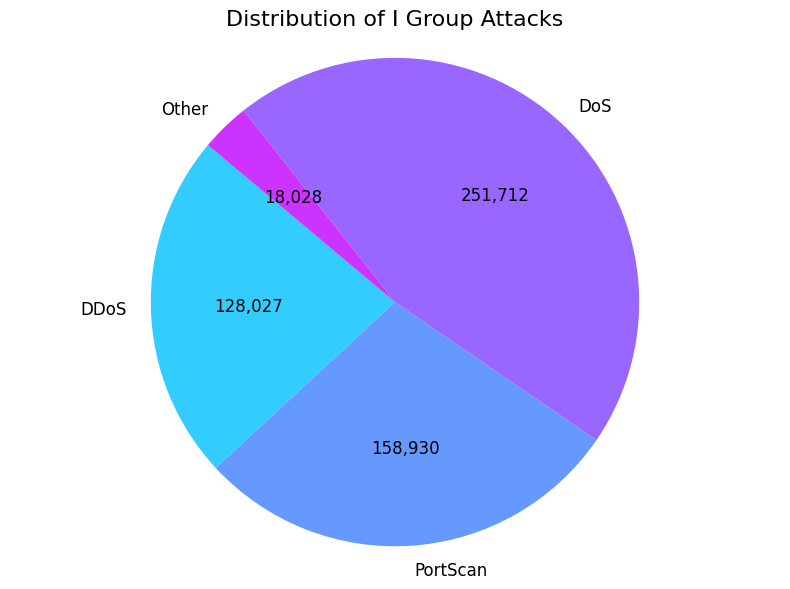

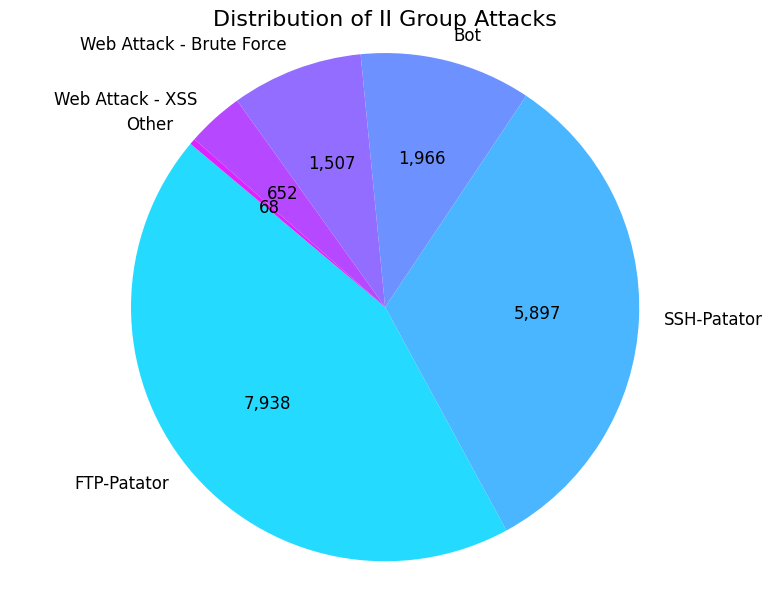

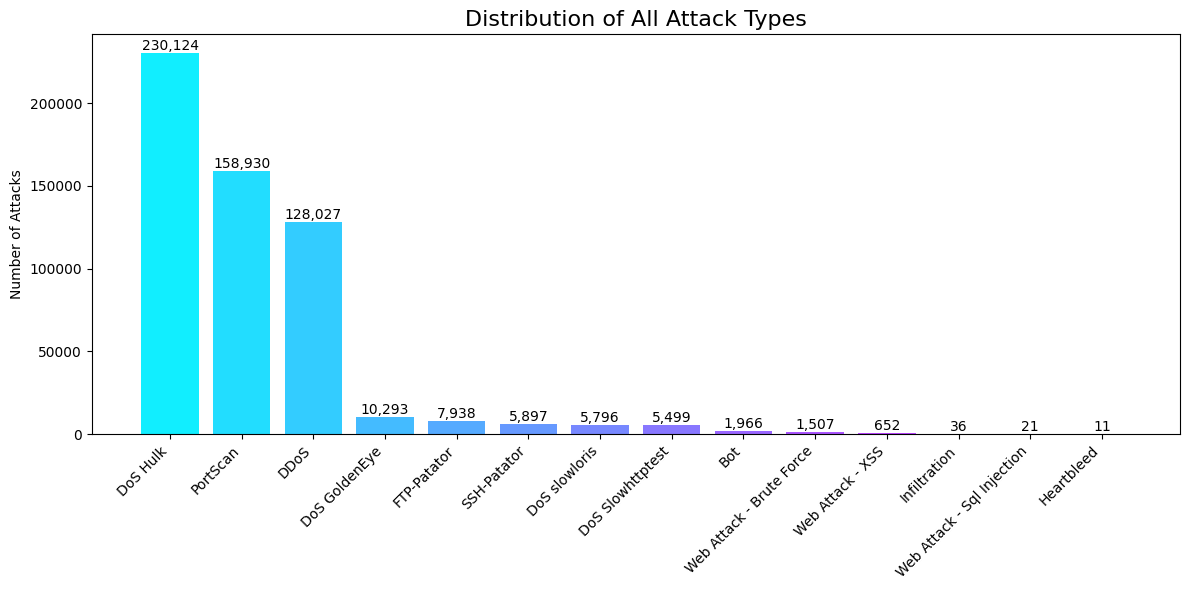

In [25]:
from collections import defaultdict

attack_counts = defaultdict(int)
dos_attacks = ['DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'DoS Slowhttptest']
main_attacks = ['DDoS', 'PortScan', 'DoS']

for day, path in datasets.items():
    day_df = load_dataset(day)
    day_df.columns = day_df.columns.str.strip()
    clean_day_df = day_df.dropna()
    labels = clean_day_df['Label'].unique()
    for label in labels:
        if label != 'BENIGN':
            count = clean_day_df[clean_day_df['Label'] == label].shape[0]
            attack_counts[label] += count

sorted_attack_counts = dict()
for k in sorted(attack_counts, key=attack_counts.get, reverse=True):
    sorted_attack_counts[k] = attack_counts[k]

dos_total = 0
for dos_label in dos_attacks:
    dos_total += sorted_attack_counts.get(dos_label, 0)

main_counts = {
    'DDoS': sorted_attack_counts.get('DDoS', 0),
    'PortScan': sorted_attack_counts.get('PortScan', 0),
    'DoS': dos_total
}

rest_counts = {}
for k, v in sorted_attack_counts.items():
    if k not in main_attacks and k not in dos_attacks:
        rest_counts[k] = v
main_counts['Other'] = sum(rest_counts.values())

# Chart 1: Main attacks
plt.figure(figsize=(8, 6))
colors_main = sns.color_palette('cool', len(main_counts))
patches1, texts1, autotexts1 = plt.pie(
    list(main_counts.values()),
    labels=list(main_counts.keys()),
    autopct=lambda pct: f"{int(pct/100.*sum(main_counts.values())):,}",
    startangle=140,
    colors=colors_main,
    textprops={'fontsize': 12}
)
plt.title('Distribution of I Group Attacks', fontsize=16)
plt.axis('equal')
for autotext in autotexts1:
    autotext.set_color('black')
    autotext.set_fontsize(12)
plt.tight_layout()
plt.savefig('saved_matplotlib/1_1/1_pie_I.png', dpi=300, bbox_inches='tight')
plt.show()


# Chart 2: Less prominent attacks
grouped_rest = {}
other_total = 0
for k, v in rest_counts.items():
    if v < 100:
        other_total += v
    else:
        grouped_rest[k] = v
if other_total > 0:
    grouped_rest['Other'] = other_total

plt.figure(figsize=(8, 6))
colors_rest = sns.color_palette('cool', len(grouped_rest))
patches2, texts2, autotexts2 = plt.pie(
    grouped_rest.values(),
    labels=grouped_rest.keys(),
    autopct=lambda pct: f"{int(pct/100.*sum(grouped_rest.values())):,}",
    startangle=140,
    colors=colors_rest,
    textprops={'fontsize': 12}
)
plt.title('Distribution of II Group Attacks', fontsize=16)
plt.axis('equal')
for autotext in autotexts2:
    autotext.set_color('black')
    autotext.set_fontsize(12)
plt.tight_layout()
plt.savefig('saved_matplotlib/1_1/1_pie_II.png', dpi=300, bbox_inches='tight')
plt.show()


# Chart 3: all attacks
plt.figure(figsize=(12, 6))
colors_all = sns.color_palette('cool', len(sorted_attack_counts))
bars = plt.bar(sorted_attack_counts.keys(), sorted_attack_counts.values(), color=colors_all)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Attacks')
plt.title('Distribution of All Attack Types', fontsize=16)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{yval:,}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.savefig('saved_matplotlib/1_1/1_bar_all_attacks.png', dpi=300, bbox_inches='tight')
plt.show()



#### 1.2

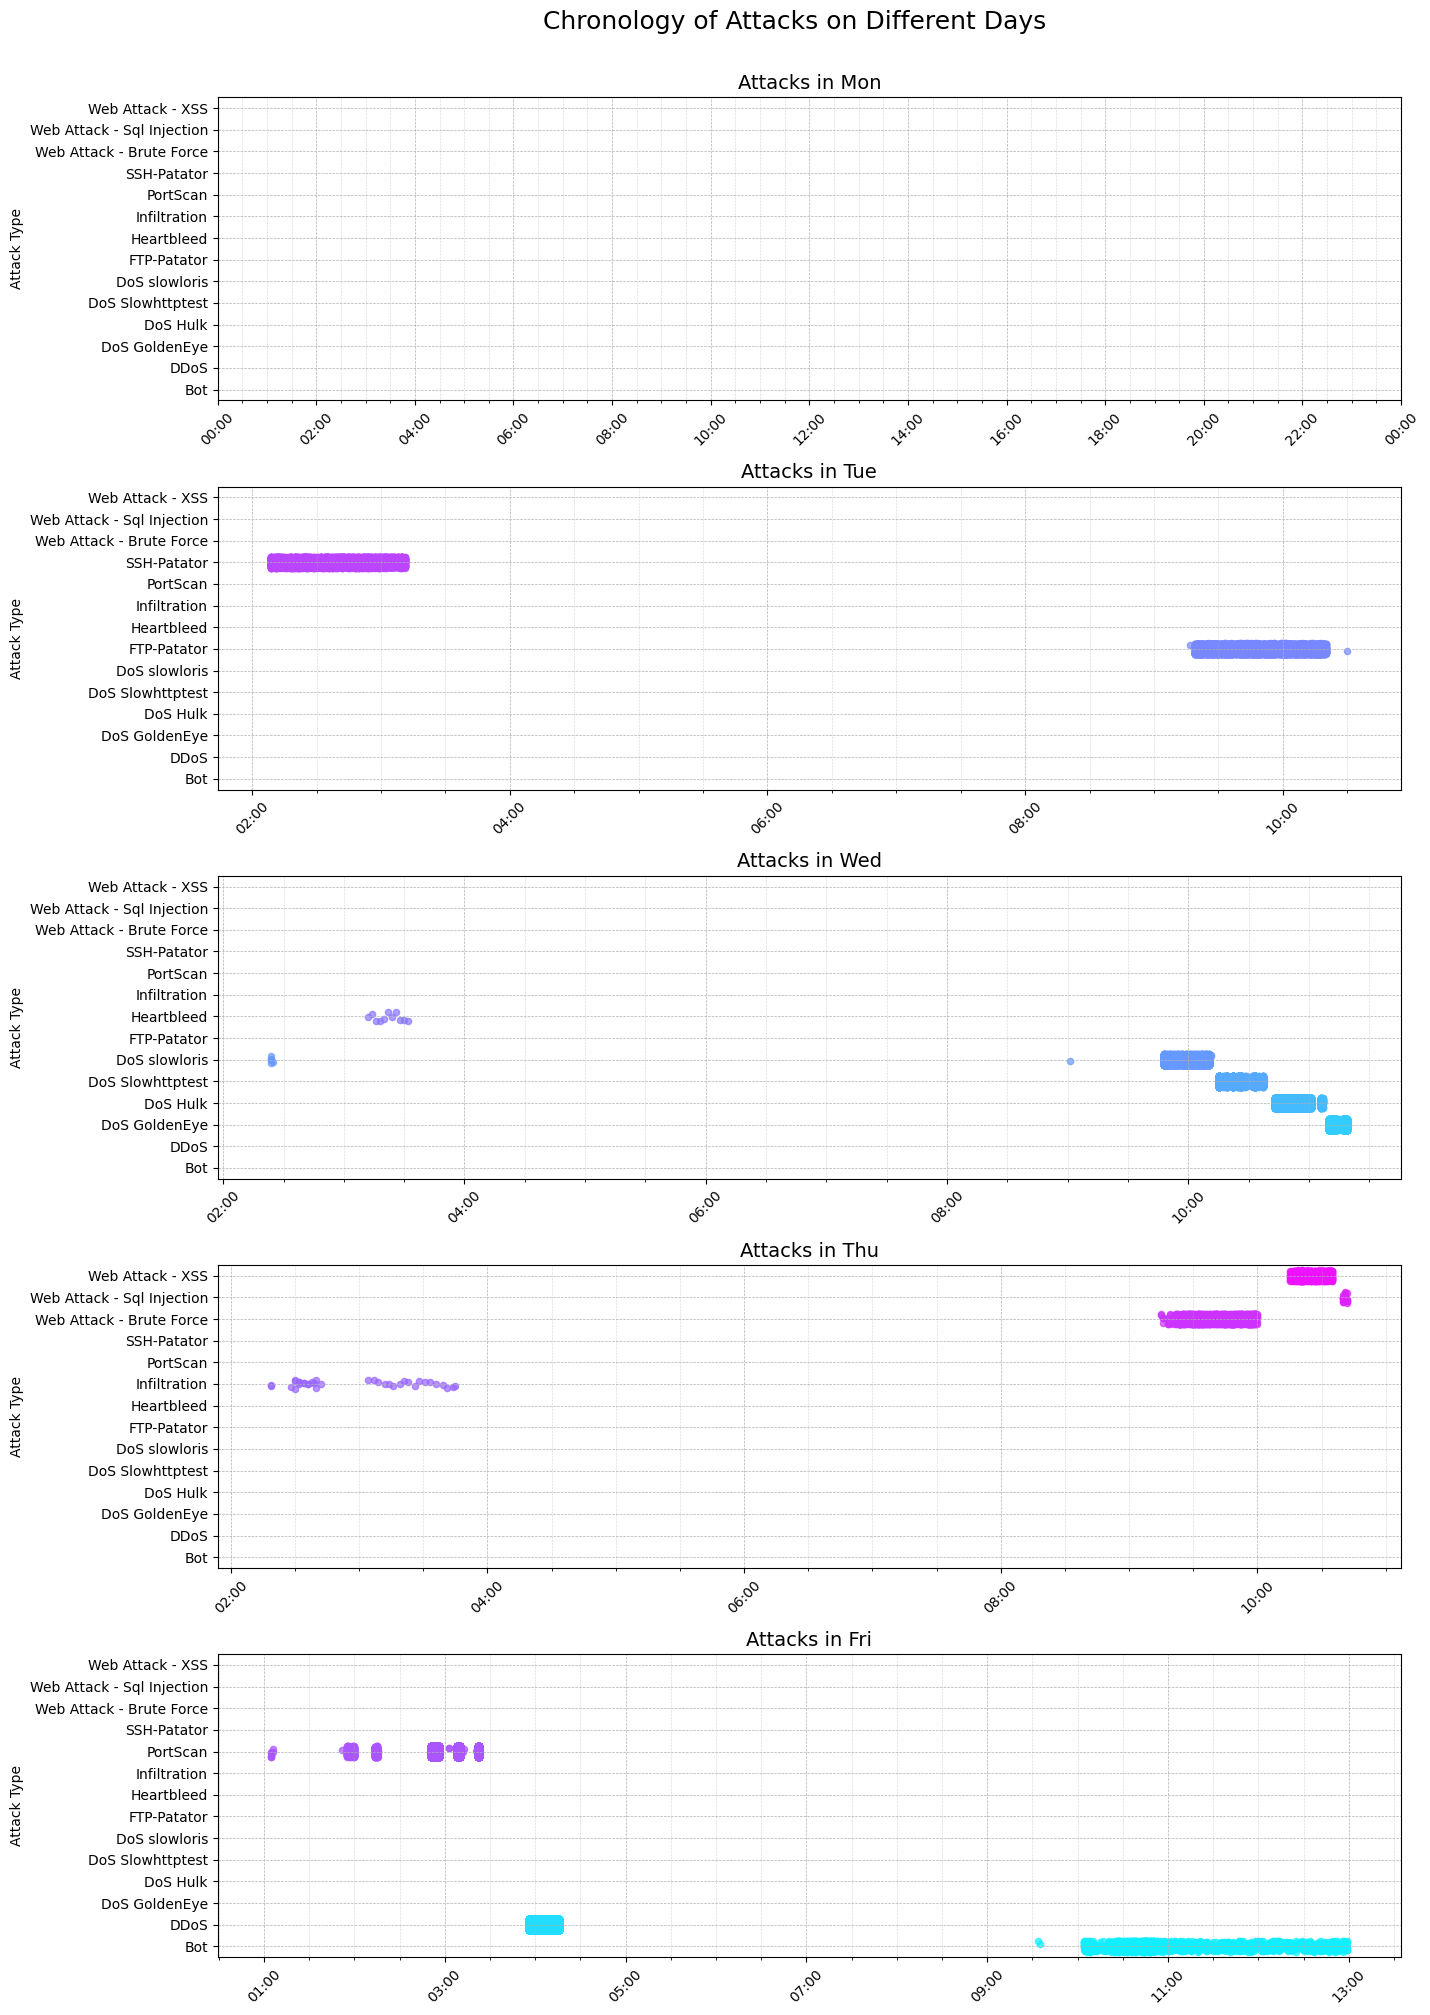

In [26]:
all_labels = set()
for day, path in datasets.items():
    day_df = load_dataset(day)
    day_df = day_df.dropna(subset=['Label'])
    non_benign = day_df[day_df['Label'] != 'BENIGN']
    unique_labels = non_benign['Label'].unique()
    for label in unique_labels:
        all_labels.add(label)

sorted_labels = sorted(list(all_labels))
label_to_y = {}
for i, label in enumerate(sorted_labels):
    label_to_y[label] = i

colors = sns.color_palette('cool', len(sorted_labels))
label_to_color = {}
for label, color in zip(sorted_labels, colors):
    label_to_color[label] = color

fig, axes = plt.subplots(
    nrows=len(datasets),
    ncols=1,
    figsize=(16, 4 * len(datasets)),
    sharex=False,
    sharey=True
)
if len(datasets) == 1:
    axes = [axes]

for i, (day, path) in enumerate(datasets.items()):
    ax = axes[i]
    day_df = load_dataset(day)
    day_df = convert_to_datetime(day_df)
    day_df = day_df.dropna(subset=['Timestamp', 'Label'])
    day_df = day_df[day_df['Label'] != 'BENIGN']

    labels_in_day = day_df['Label'].unique()
    for label in labels_in_day:
        if label in label_to_y:
            subset = day_df[day_df['Label'] == label]
            y_base = label_to_y[label]
            y_jitter = y_base + np.random.uniform(-0.25, 0.25, size=len(subset))

            ax.scatter(
                subset['Timestamp'],
                y_jitter,
                color=label_to_color[label],
                s=20,
                alpha=0.7,
                label=label
            )

    ax.set_yticks(list(range(len(sorted_labels))))
    ax.set_yticklabels(sorted_labels)
    ax.set_ylim(-0.5, len(sorted_labels) - 0.5)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_minor_locator(mdates.MinuteLocator(byminute=[0, 30]))
    ax.tick_params(axis='x', rotation=45)

    ax.set_title(f'Attacks in {day}', fontsize=14)
    ax.set_ylabel('Attack Type')
    ax.grid(True, which='major', linestyle='--', linewidth=0.5)
    ax.grid(True, which='minor', axis='x', linestyle=':', linewidth=0.4)

fig.suptitle('Chronology of Attacks on Different Days', fontsize=18, y=1.005)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('saved_matplotlib/1_2/1_scatter_attacks_timeline.png', dpi=300, bbox_inches='tight')
plt.show()


#### 1.3

C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\4056609409.py:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




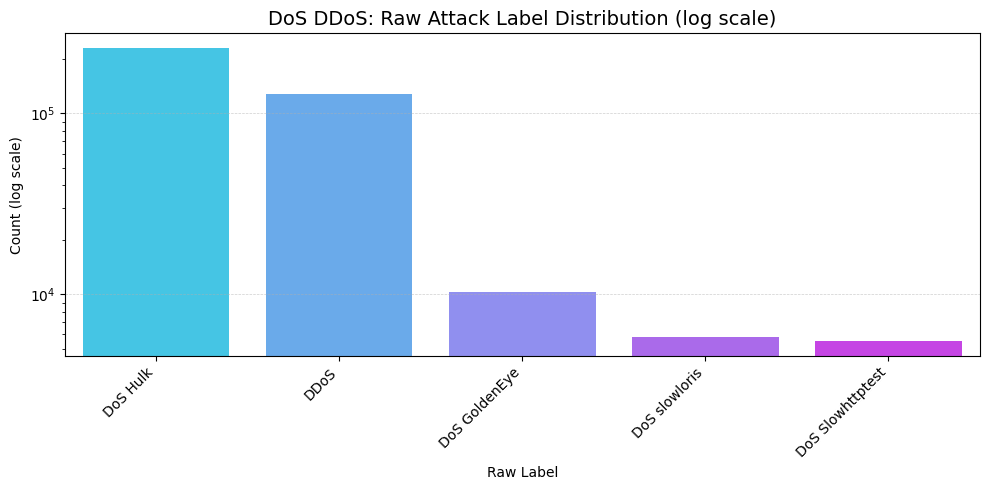

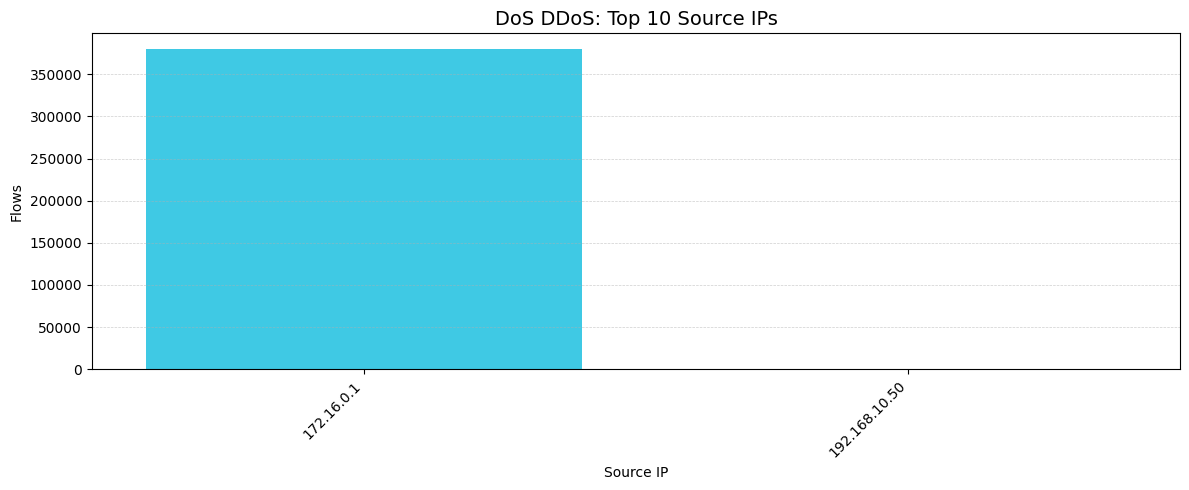

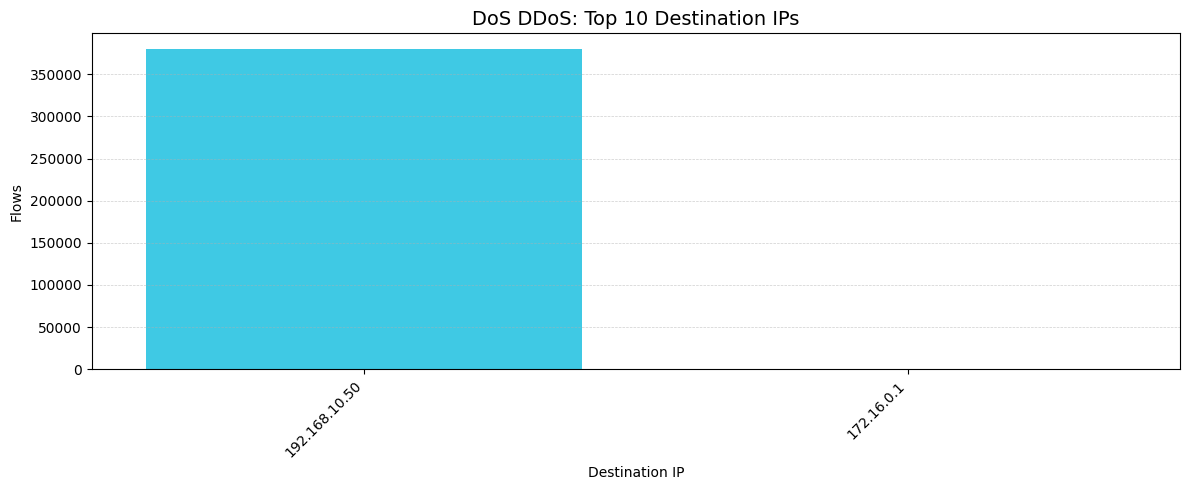

C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\4056609409.py:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




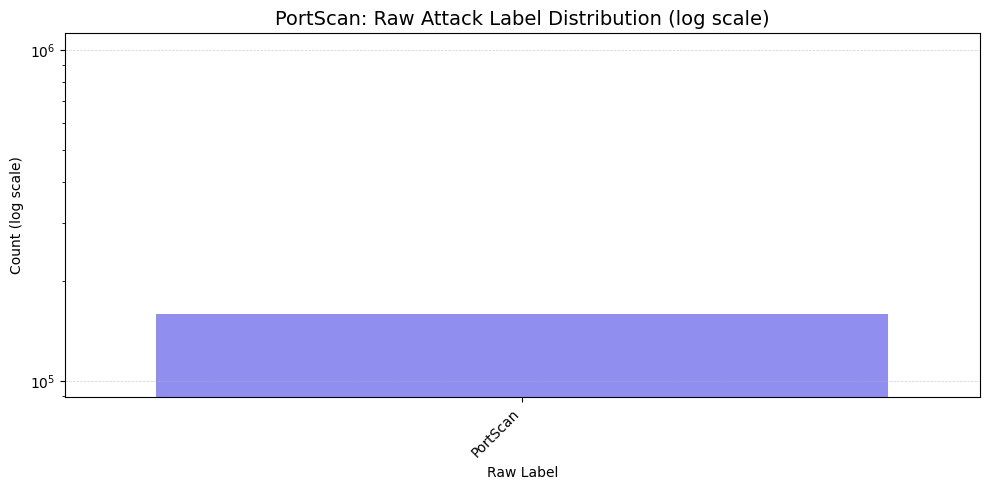

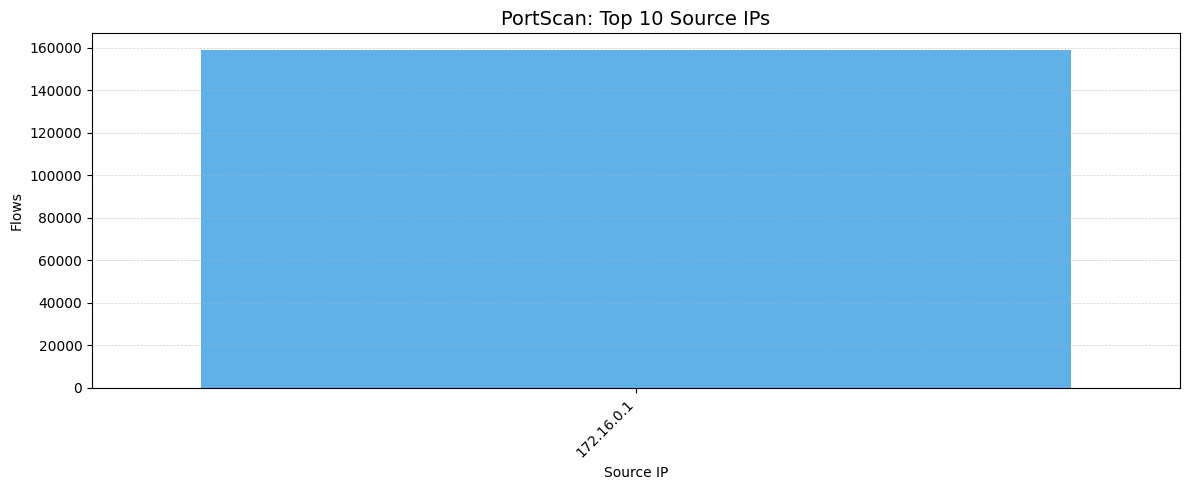

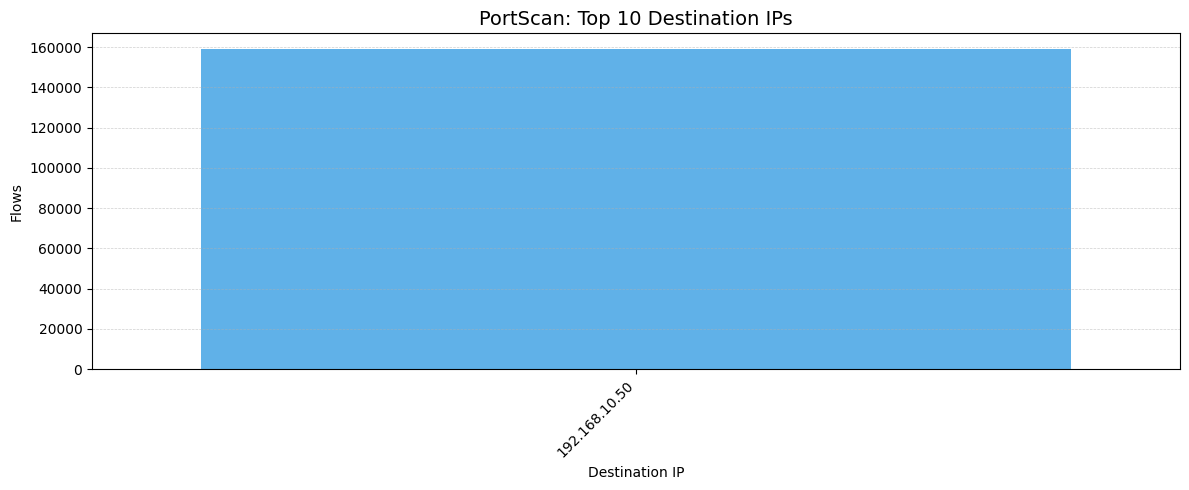

C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\4056609409.py:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




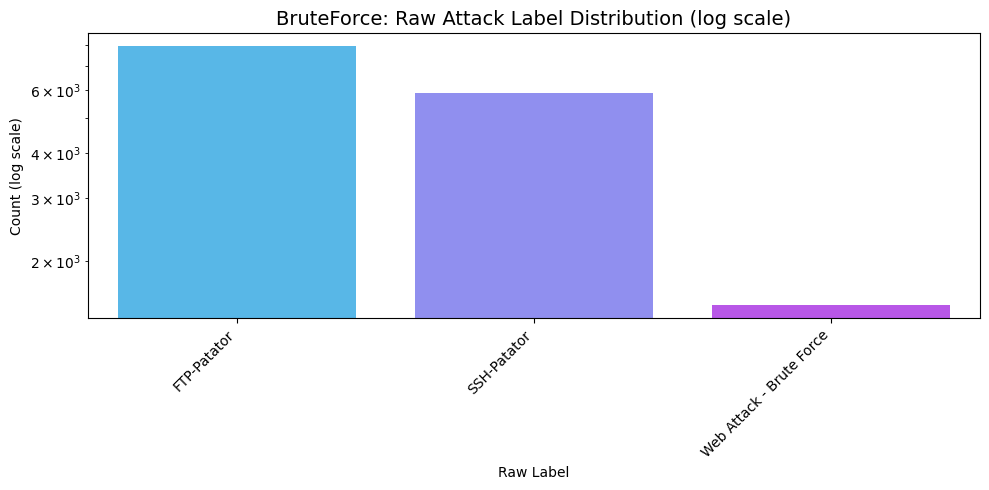

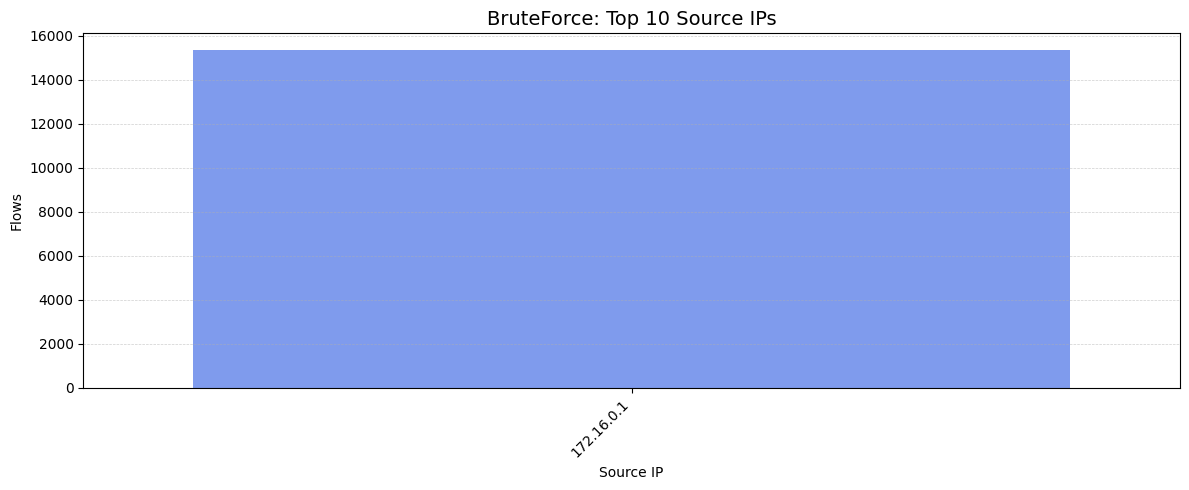

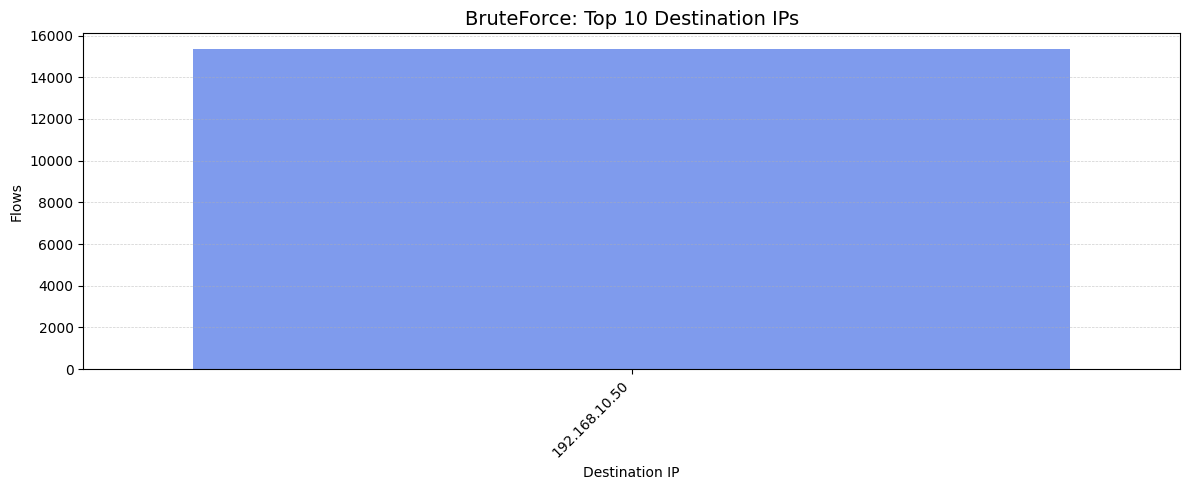

C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\4056609409.py:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




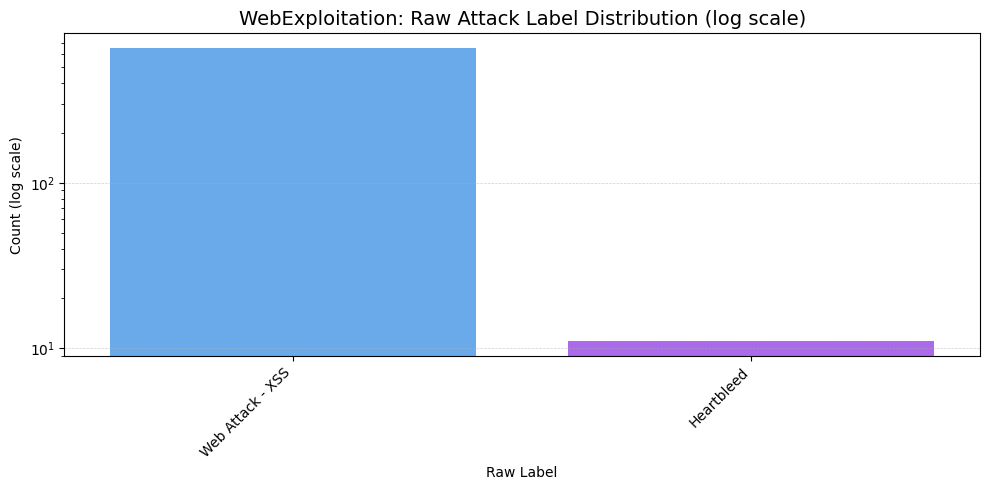

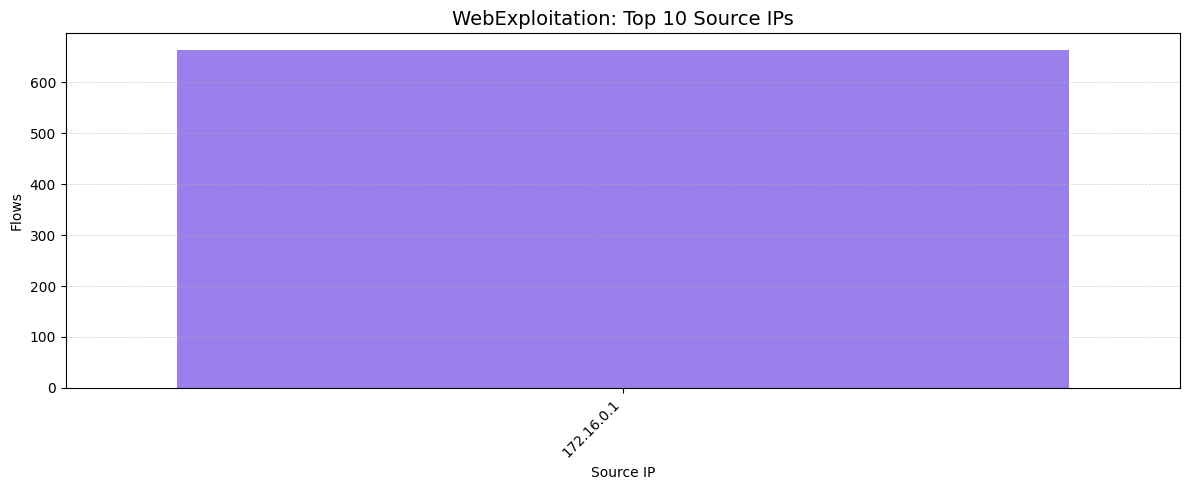

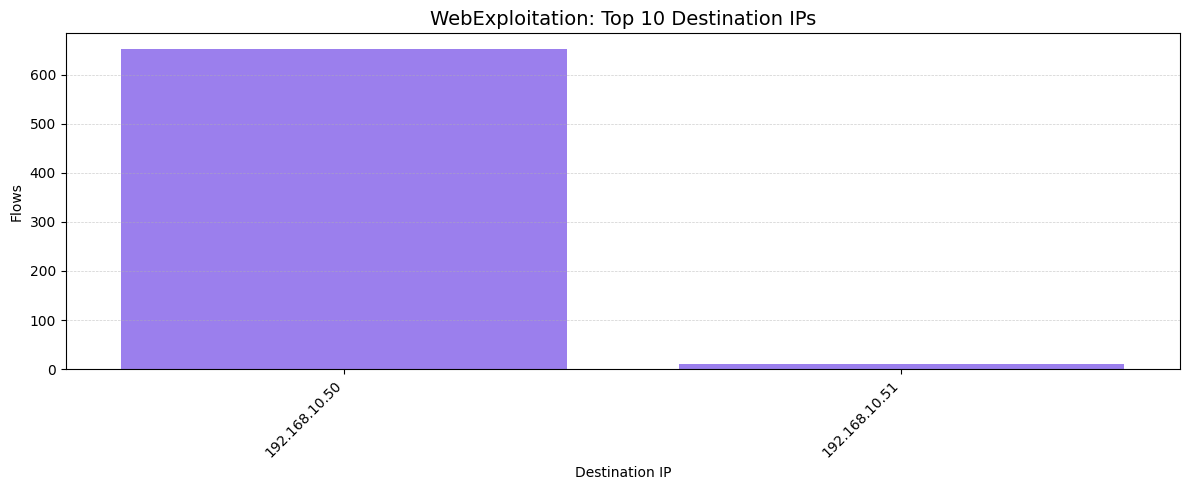

C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\4056609409.py:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




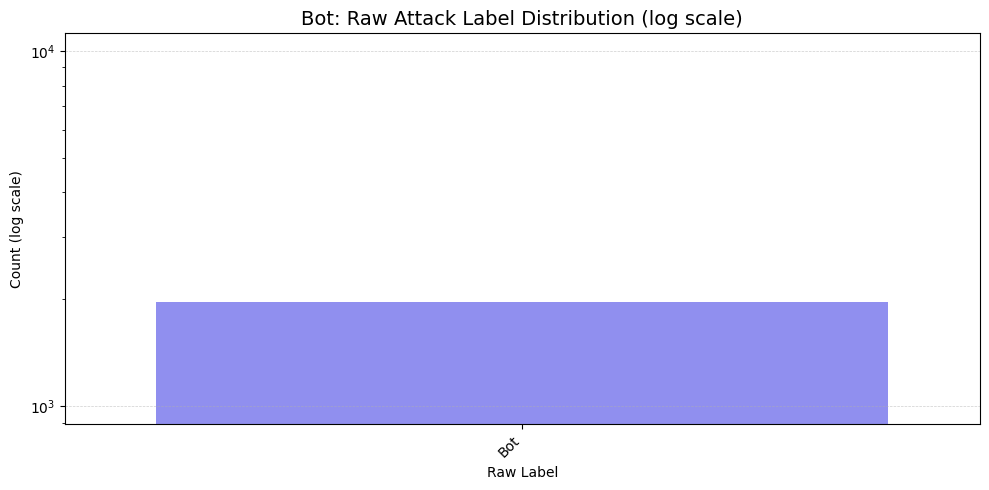

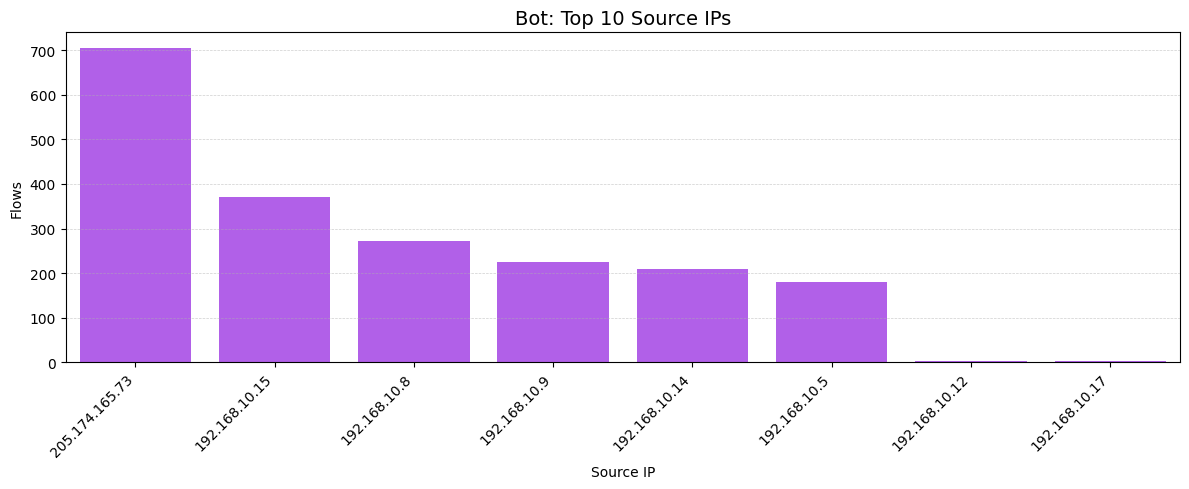

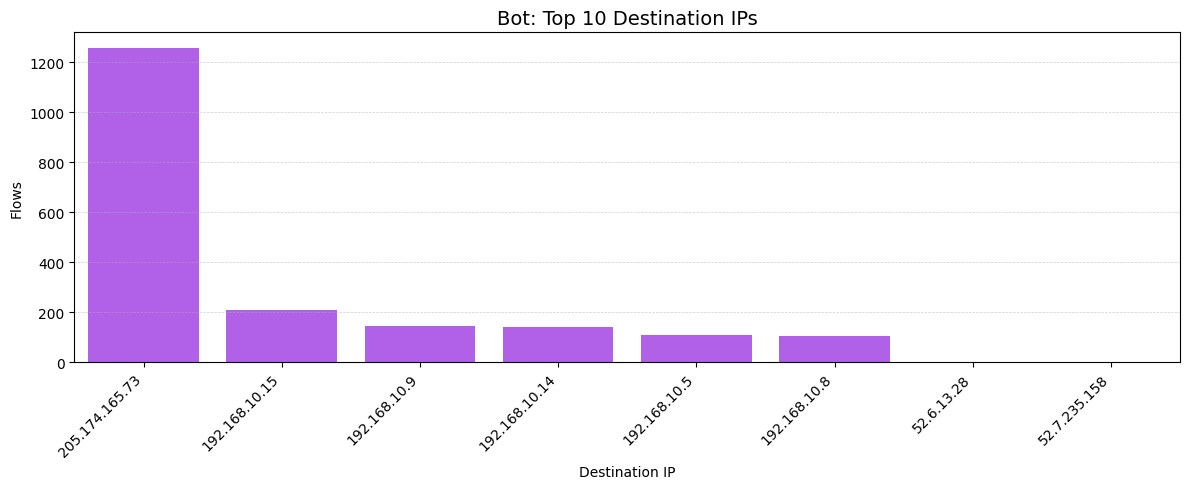

C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\4056609409.py:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




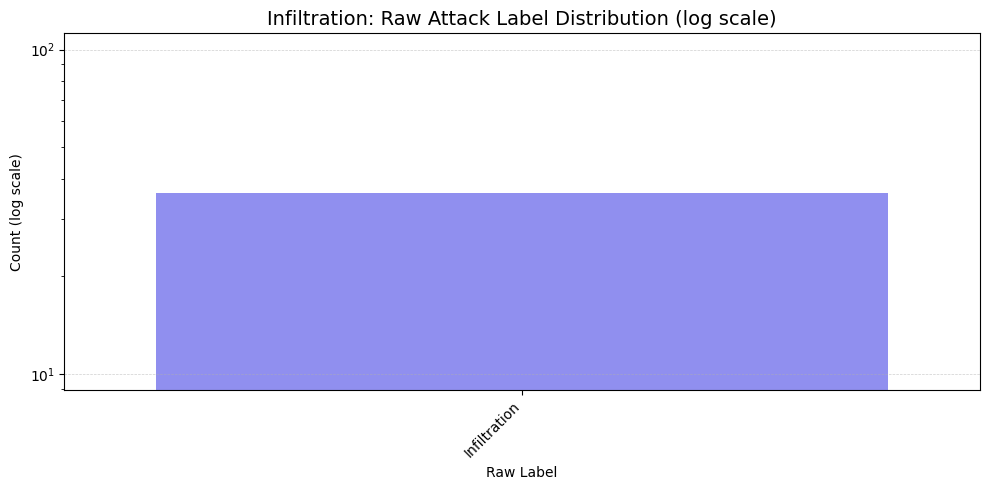

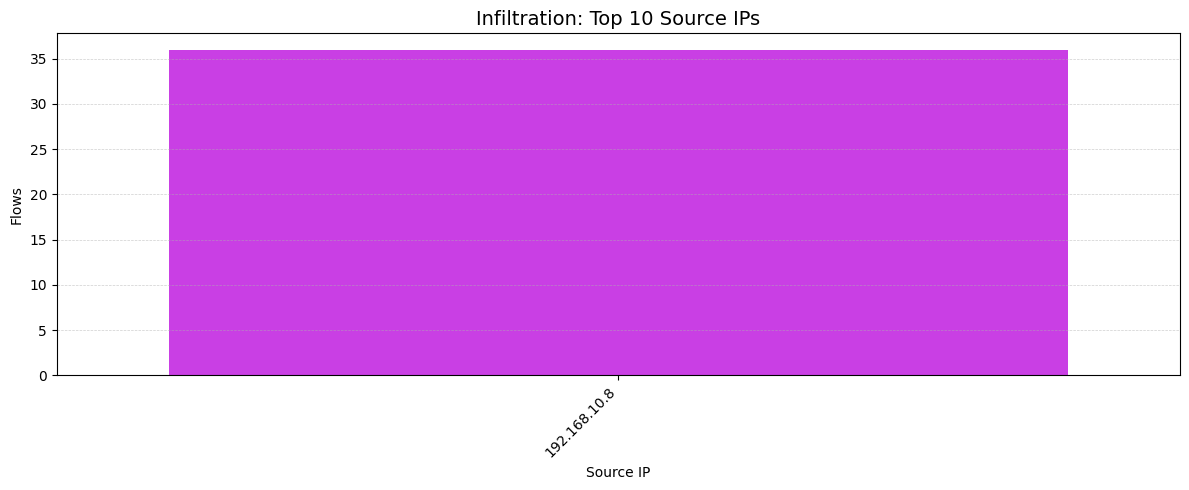

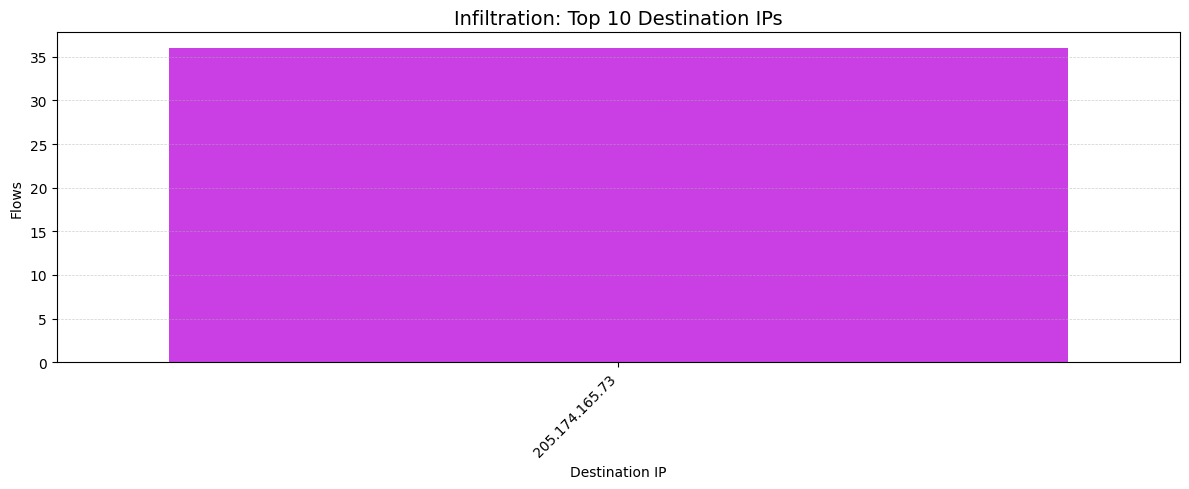

In [27]:
df_full = load_full_dataset()
df_full.columns = df_full.columns.str.strip()

def map_to_group(label: str) -> str:
    if label == 'BENIGN':
        return 'BENIGN'
    dos_variants = {'DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'DoS Slowhttptest', 'DDoS'}
    if label in dos_variants:
        return 'DoS DDoS'
    if label == 'PortScan':
        return 'PortScan'
    if label in {'FTP-Patator', 'SSH-Patator', 'Web Attack - Brute Force'}:
        return 'BruteForce'
    if label in {'Web Attack - XSS', 'Web Attack - SQL Injection', 'Heartbleed'}:
        return 'WebExploitation'
    if label == 'Bot':
        return 'Bot'
    if label == 'Infiltration':
        return 'Infiltration'
    return 'Other'

df_full['AggGroup'] = df_full['Label'].apply(map_to_group)

agg_groups_order = ['DoS DDoS', 'PortScan', 'BruteForce', 'WebExploitation', 'Bot', 'Infiltration']
palette = sns.color_palette('cool', n_colors=len(agg_groups_order))
group_to_color = {g: c for g, c in zip(agg_groups_order, palette)}

df_time = df_full.copy()
df_time = convert_to_datetime(df_time, column='Timestamp')
df_time = df_time.dropna(subset=['Timestamp', 'AggGroup'])

bin_size_group = '60S'

top_n_per_group = 10

for g in agg_groups_order:
    col = group_to_color[g]
    df_g = df_full[df_full['AggGroup'] == g].copy()
    if df_g.empty:
        continue

    # 1) Class distribution inside the group (raw labels contributing to this group)
    counts_by_label_g = (
        df_g['Label'].value_counts().sort_values(ascending=False)
    )

    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=counts_by_label_g.index,
        y=counts_by_label_g.values,
        palette=sns.color_palette('cool', n_colors=len(counts_by_label_g))
    )
    plt.yscale('log')
    plt.title(f'{g}: Raw Attack Label Distribution (log scale)', fontsize=14)
    plt.xlabel('Raw Label')
    plt.ylabel('Count (log scale)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
    plt.tight_layout()
    plt.savefig(f'saved_matplotlib/1_3/1_bar_{g}_I.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 2) Flows over time for this group only (single line)
    df_time_g = df_time[df_time['AggGroup'] == g].copy()
    if not df_time_g.empty:
        ts_g = (
            df_time_g
            .groupby(pd.Grouper(key='Timestamp', freq=bin_size_group))['Label']
            .count()
            .fillna(0)
        )

        plt.figure(figsize=(12, 5))
        plt.plot(ts_g.index, ts_g.values, color=col, linewidth=1.2)
        plt.title(f'{g}: Flows over Time (bin={bin_size_group})', fontsize=14)
        plt.xlabel('Time')
        plt.ylabel('Flows per bin')
        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(ax.xaxis.get_major_locator()))
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
        plt.tight_layout()
        plt.savefig(f'saved_matplotlib/1_3/1_line_{g}.png', dpi=300, bbox_inches='tight')
        plt.show()

    # 3) Top source IPs (talkers) within the group
    top_src_g = (
        df_g['Source IP']
        .value_counts()
        .head(top_n_per_group)
    )
    if not top_src_g.empty:
        plt.figure(figsize=(12, 5))
        sns.barplot(
            x=top_src_g.index,
            y=top_src_g.values,
            color=col
        )
        plt.title(f'{g}: Top {top_n_per_group} Source IPs', fontsize=14)
        plt.xlabel('Source IP')
        plt.ylabel('Flows')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
        plt.tight_layout()
        plt.savefig(f'saved_matplotlib/1_3/1_bar_{g}_II.png', dpi=300, bbox_inches='tight')
        plt.show()

    # 4) Top targets (dst IP) within the group
    top_dst_g = (
        df_g['Destination IP']
        .value_counts()
        .head(top_n_per_group)
    )
    if not top_dst_g.empty:
        plt.figure(figsize=(12, 5))
        sns.barplot(
            x=top_dst_g.index,
            y=top_dst_g.values,
            color=col
        )
        plt.title(f'{g}: Top {top_n_per_group} Destination IPs', fontsize=14)
        plt.xlabel('Destination IP')
        plt.ylabel('Flows')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
        plt.tight_layout()
        plt.savefig(f'saved_matplotlib/1_3/1_bar_{g}_III.png', dpi=300, bbox_inches='tight')
        plt.show()

#### 1.4

C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\1230747367.py:53: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\1230747367.py:70: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\1230747367.py:70: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.

C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\1230747367.py:70: FutureWarning:



Passing `palette` without assigning `hue` is depre

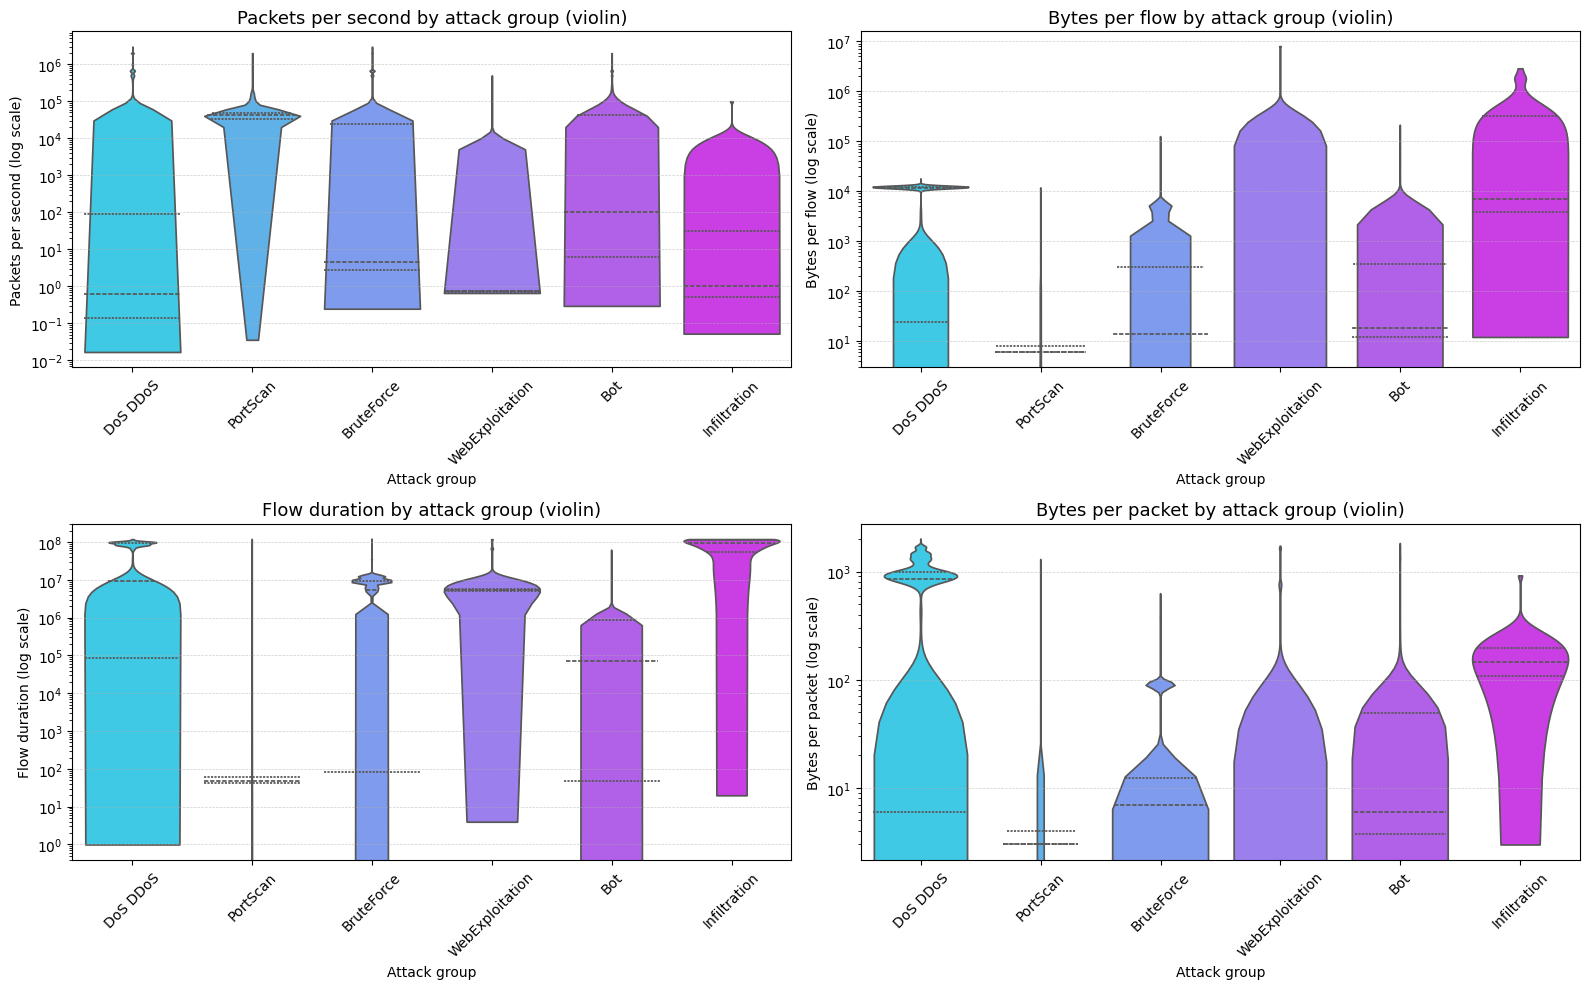

C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\1230747367.py:97: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\1230747367.py:97: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\1230747367.py:97: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\1230747367.py:97: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

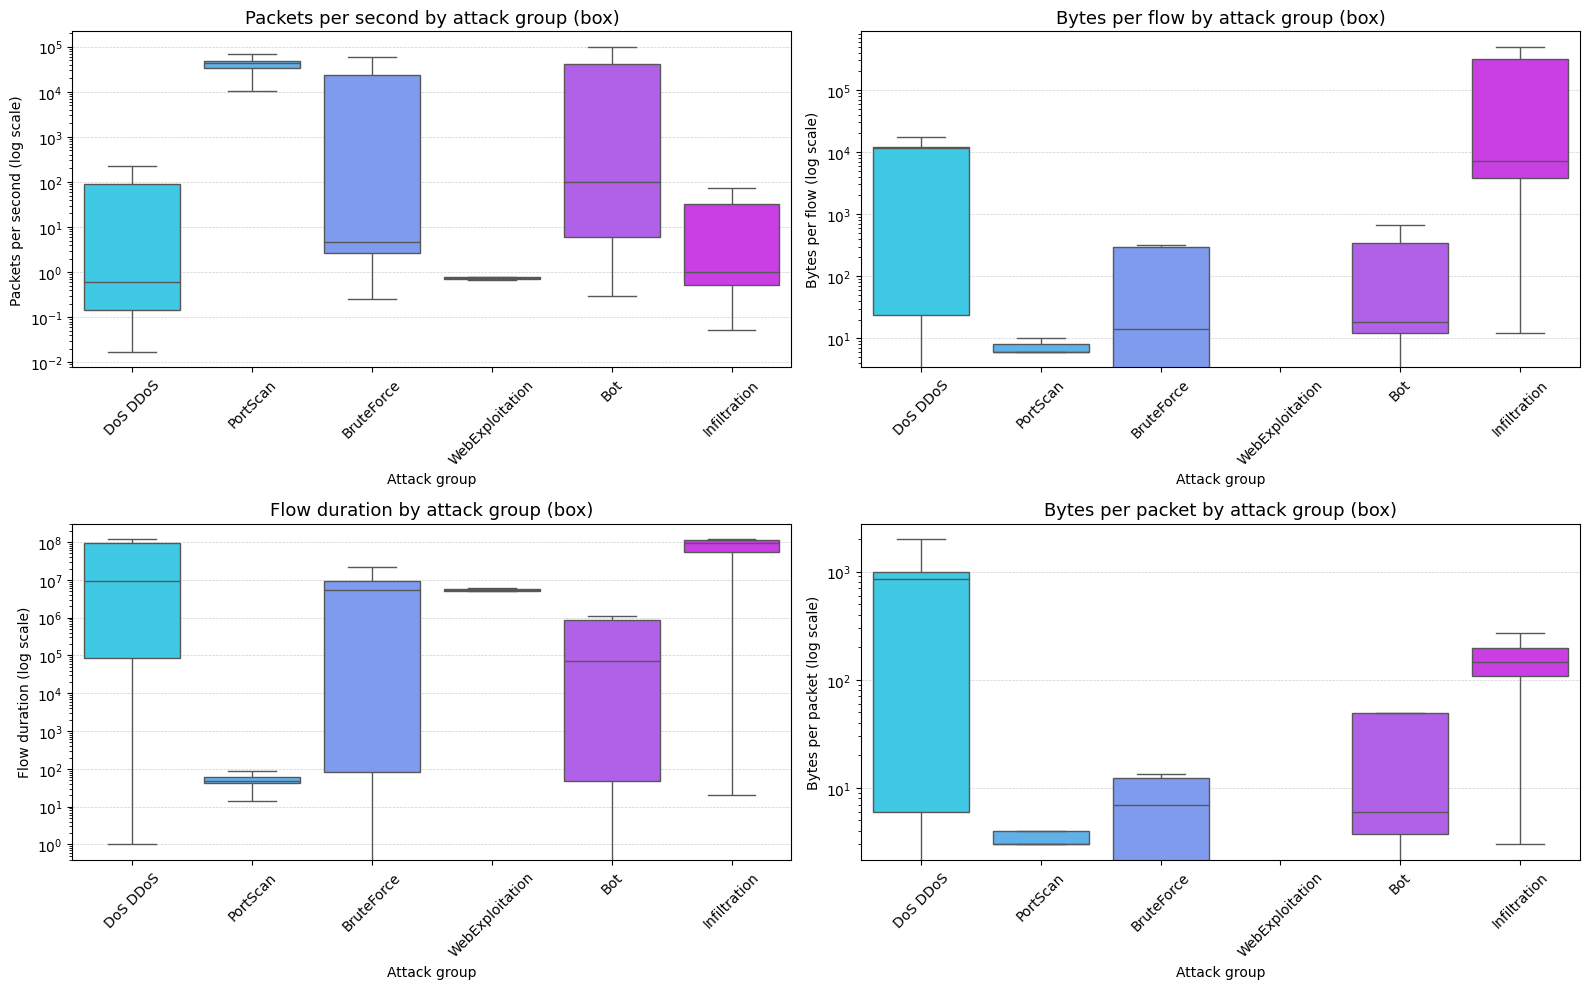

C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\1230747367.py:53: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



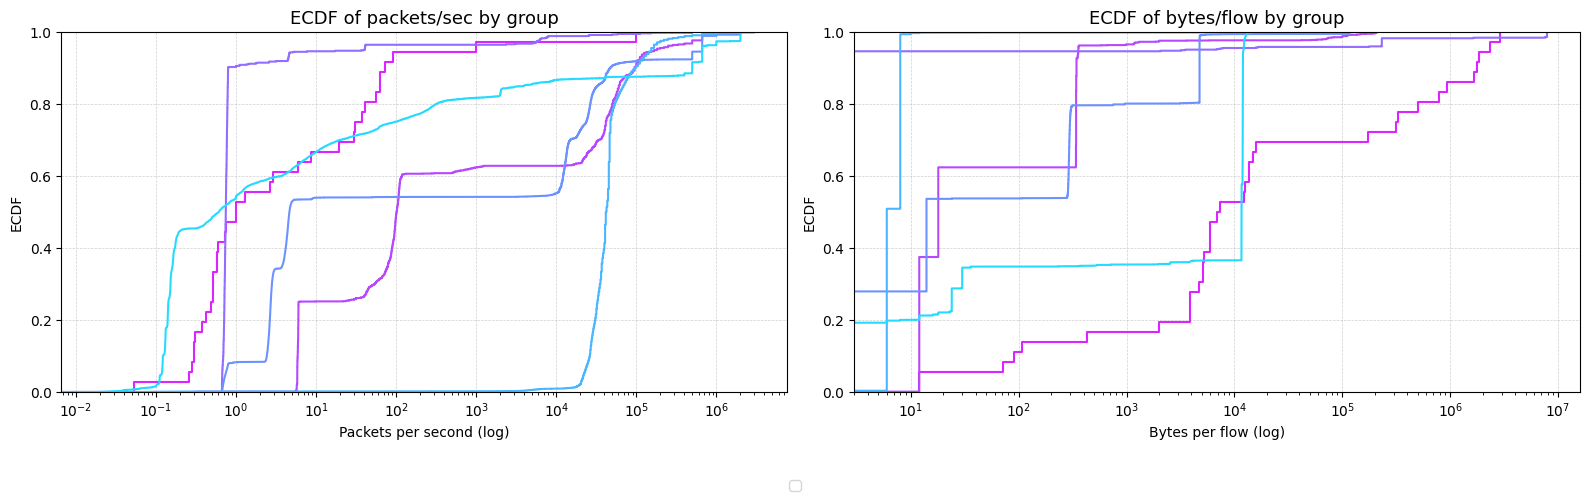

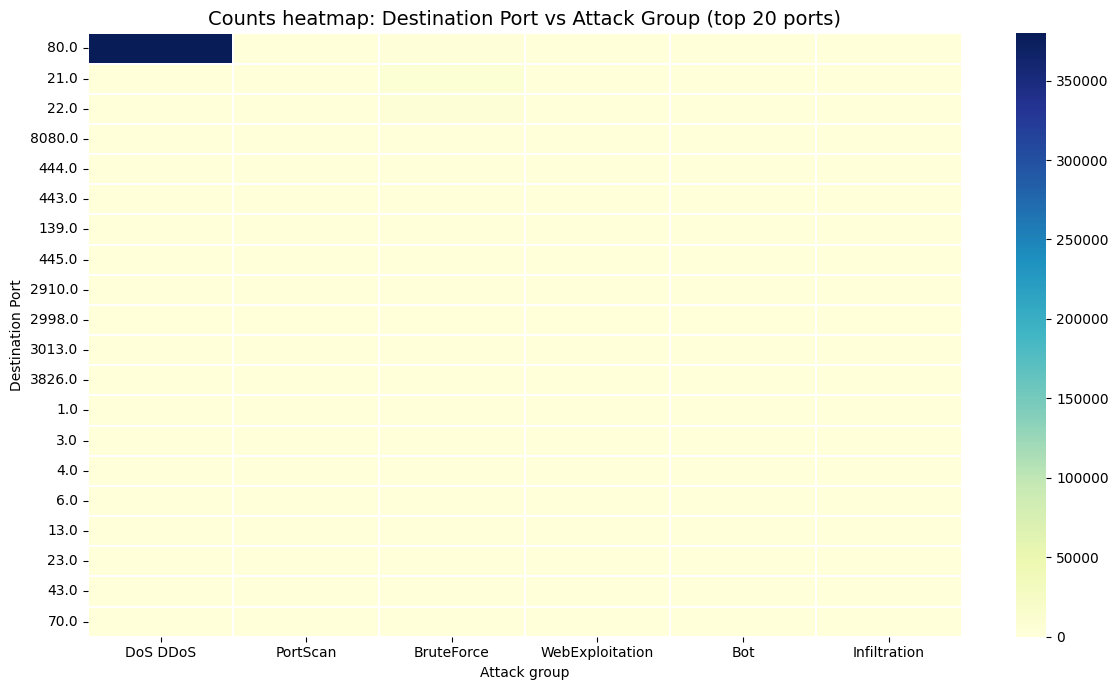

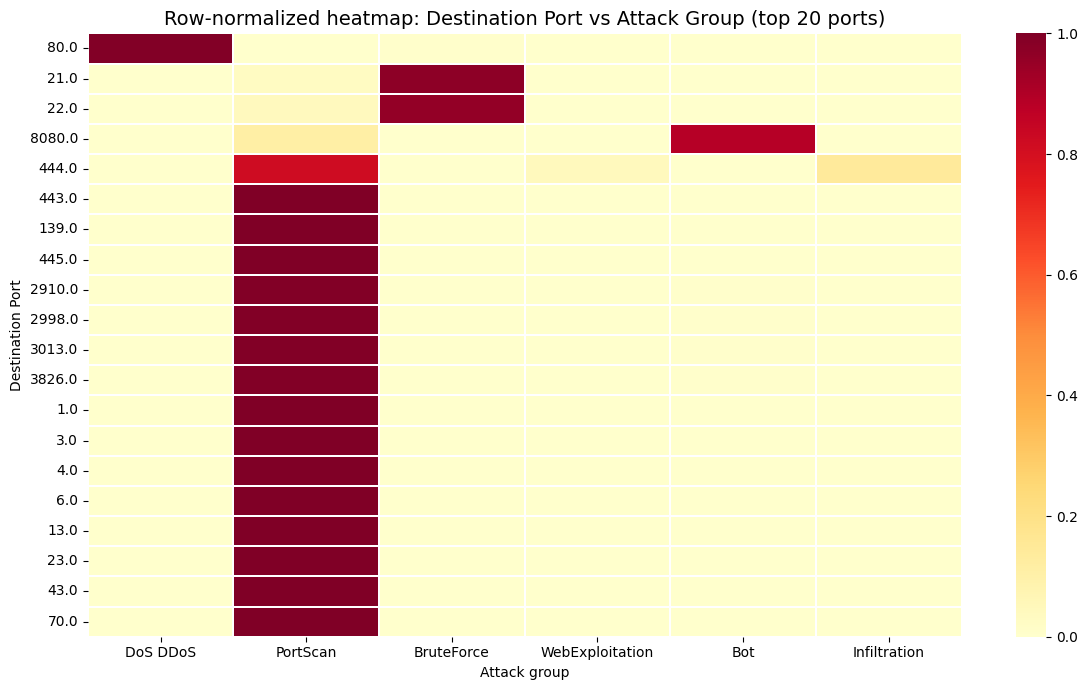

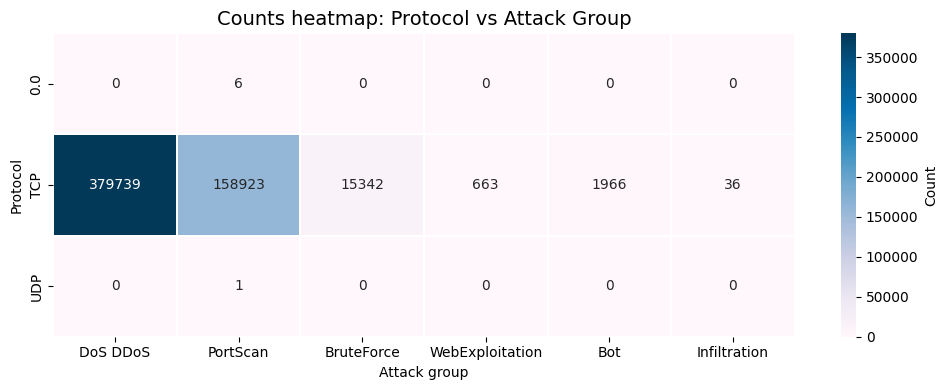

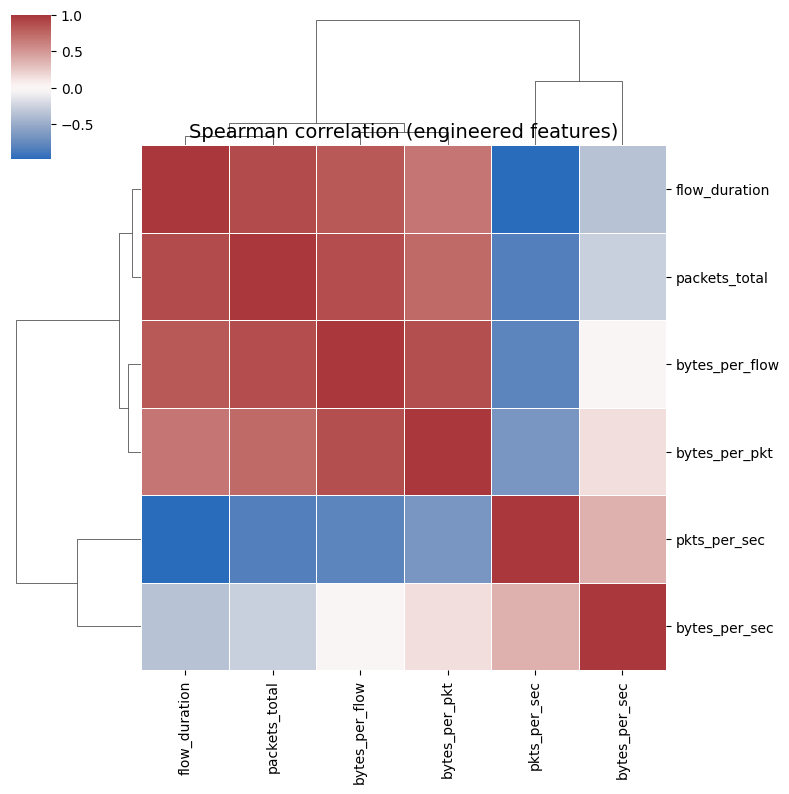

In [28]:
if 'df_full' not in globals():
    df_full = load_full_dataset()
    df_full.columns = df_full.columns.str.strip()

def map_to_group(label: str) -> str:
    if label == 'BENIGN':
        return 'BENIGN'
    dos_variants = {'DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'DoS Slowhttptest', 'DDoS'}
    if label in dos_variants:
        return 'DoS DDoS'
    if label == 'PortScan':
        return 'PortScan'
    if label in {'FTP-Patator', 'SSH-Patator', 'Web Attack - Brute Force'}:
        return 'BruteForce'
    if label in {'Web Attack - XSS', 'Web Attack - SQL Injection', 'Heartbleed'}:
        return 'WebExploitation'
    if label == 'Bot':
        return 'Bot'
    if label == 'Infiltration':
        return 'Infiltration'
    return 'Other'

if 'AggGroup' not in df_full.columns:
    df_full['AggGroup'] = df_full['Label'].apply(map_to_group)

agg_groups_order = ['DoS DDoS', 'PortScan', 'BruteForce', 'WebExploitation', 'Bot', 'Infiltration']
palette = sns.color_palette('cool', n_colors=len(agg_groups_order))
group_to_color = {g: c for g, c in zip(agg_groups_order, palette)}

df_feat = df_full.copy()
# Basic safeguards
for col in ['Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Total Fwd Packets', 'Total Backward Packets',
            'Flow Packets/s', 'Flow Bytes/s', 'Flow Duration']:
    if col not in df_feat.columns:
        df_feat[col] = np.nan

df_feat['bytes_per_flow'] = df_feat['Total Length of Fwd Packets'].fillna(0) + df_feat['Total Length of Bwd Packets'].fillna(0)
df_feat['packets_total'] = df_feat['Total Fwd Packets'].fillna(0) + df_feat['Total Backward Packets'].fillna(0)
df_feat['bytes_per_pkt'] = df_feat['bytes_per_flow'] / df_feat['packets_total'].replace(0, np.nan)
df_feat['pkts_per_sec'] = df_feat['Flow Packets/s']
df_feat['bytes_per_sec'] = df_feat['Flow Bytes/s']
df_feat['flow_duration'] = df_feat['Flow Duration']

# cleanup
df_feat.replace([np.inf, -np.inf], np.nan, inplace=True)

df_feat_attacks = df_feat[df_feat['AggGroup'].isin(agg_groups_order)].copy()

# Cherry pick samples per group for plotting
def per_group_sample(d, group_col, max_n=30000, seed=42):
    return (
        d.groupby(group_col, group_keys=False)
         .apply(lambda x: x.sample(n=min(len(x), max_n), random_state=seed))
         .reset_index(drop=True)
    )

df_feat_sample = per_group_sample(df_feat_attacks, 'AggGroup', max_n=30000)

# 1. Violin
metrics = [
    ('pkts_per_sec', 'Packets per second'),
    ('bytes_per_flow', 'Bytes per flow'),
    ('flow_duration', 'Flow duration'),
    ('bytes_per_pkt', 'Bytes per packet'),
]

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=False)
axes = axes.flatten()
for ax, (col, label) in zip(axes, metrics):
    sns.violinplot(
        data=df_feat_sample,
        x='AggGroup',
        y=col,
        palette=[group_to_color[g] for g in agg_groups_order],
        order=agg_groups_order,
        inner='quartile',
        ax=ax,
        cut=0,
        scale='width'
    )
    # Log-scale for heavy tails
    if col in ('pkts_per_sec', 'bytes_per_flow', 'flow_duration', 'bytes_per_pkt'):
        ax.set_yscale('log')
    ax.set_title(f'{label} by attack group (violin)', fontsize=13)
    ax.set_xlabel('Attack group')
    ax.set_ylabel(label + (' (log scale)' if col in ('pkts_per_sec','bytes_per_flow','flow_duration','bytes_per_pkt') else ''))
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.savefig('saved_matplotlib/1_4/1_violin_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Box plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=False)
axes = axes.flatten()
for ax, (col, label) in zip(axes, metrics):
    sns.boxplot(
        data=df_feat_sample,
        x='AggGroup',
        y=col,
        palette=[group_to_color[g] for g in agg_groups_order],
        order=agg_groups_order,
        ax=ax,
        showfliers=False
    )
    if col in ('pkts_per_sec', 'bytes_per_flow', 'flow_duration', 'bytes_per_pkt'):
        ax.set_yscale('log')
    ax.set_title(f'{label} by attack group (box)', fontsize=13)
    ax.set_xlabel('Attack group')
    ax.set_ylabel(label + (' (log scale)' if col in ('pkts_per_sec','bytes_per_flow','flow_duration','bytes_per_pkt') else ''))
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.savefig('saved_matplotlib/1_4/1_box_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. ECDF plots
ecdf_sample = per_group_sample(df_feat_attacks[['AggGroup','pkts_per_sec','bytes_per_flow']], 'AggGroup', max_n=20000)

fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=False)
sns.ecdfplot(
    data=ecdf_sample,
    x='pkts_per_sec',
    hue='AggGroup',
    hue_order=agg_groups_order,
    palette=[group_to_color[g] for g in agg_groups_order],
    ax=axes[0]
)
axes[0].set_xscale('log')
axes[0].set_title('ECDF of packets/sec by group', fontsize=13)
axes[0].set_xlabel('Packets per second (log)')
axes[0].set_ylabel('ECDF')
axes[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

sns.ecdfplot(
    data=ecdf_sample,
    x='bytes_per_flow',
    hue='AggGroup',
    hue_order=agg_groups_order,
    palette=[group_to_color[g] for g in agg_groups_order],
    ax=axes[1]
)
axes[1].set_xscale('log')
axes[1].set_title('ECDF of bytes/flow by group', fontsize=13)
axes[1].set_xlabel('Bytes per flow (log)')
axes[1].set_ylabel('ECDF')
axes[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, frameon=True)
for ax in axes:
    ax.legend_.remove()
plt.tight_layout(rect=[0, 0.08, 1, 1])
plt.savefig('saved_matplotlib/1_4/1_ecdf_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Heatmaps of counts: (Destination Port vs AggGroup) and (Protocol vs AggGroup)
attacks_only = df_full[df_full['AggGroup'].isin(agg_groups_order)].copy()

top_n_ports = 20
port_ct = pd.crosstab(attacks_only['Destination Port'], attacks_only['AggGroup'])
top_ports_idx = port_ct.sum(axis=1).nlargest(top_n_ports).index
port_ct_top = port_ct.loc[top_ports_idx].reindex(columns=agg_groups_order)

plt.figure(figsize=(12, 7))
sns.heatmap(
    port_ct_top,
    cmap='YlGnBu',
    linewidths=0.3,
    linecolor='white'
)
plt.title(f'Counts heatmap: Destination Port vs Attack Group (top {top_n_ports} ports)', fontsize=14)
plt.xlabel('Attack group')
plt.ylabel('Destination Port')
plt.tight_layout()
plt.savefig('saved_matplotlib/1_4/1_heatmap_port_vs_group.png', dpi=300, bbox_inches='tight')
plt.show()


port_row_norm = port_ct_top.div(port_ct_top.sum(axis=1).replace(0, np.nan), axis=0)

plt.figure(figsize=(12, 7))
sns.heatmap(
    port_row_norm,
    cmap='YlOrRd',
    annot=False,
    linewidths=0.3,
    linecolor='white'
)
plt.title(f'Row-normalized heatmap: Destination Port vs Attack Group (top {top_n_ports} ports)', fontsize=14)
plt.xlabel('Attack group')
plt.ylabel('Destination Port')
plt.tight_layout()
plt.savefig('saved_matplotlib/1_4/1_heatmap_port_vs_group_rownorm.png', dpi=300, bbox_inches='tight')
plt.show()

# Protocol vs Group
proto_map = {6: 'TCP', 17: 'UDP', 1: 'ICMP'}
attacks_only['ProtocolName'] = attacks_only['Protocol'].map(proto_map).fillna(attacks_only['Protocol'].astype(str))
proto_ct = pd.crosstab(attacks_only['ProtocolName'], attacks_only['AggGroup']).reindex(columns=agg_groups_order)

plt.figure(figsize=(10, 4))
sns.heatmap(
    proto_ct,
    cmap='PuBu',
    annot=True,
    fmt='g',
    cbar_kws={'label': 'Count'},
    linewidths=0.3,
    linecolor='white'
)
plt.title('Counts heatmap: Protocol vs Attack Group', fontsize=14)
plt.xlabel('Attack group')
plt.ylabel('Protocol')
plt.tight_layout()
plt.savefig('saved_matplotlib/1_4/1_heatmap_protocol_vs_group.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Correlation heatmap (Spearman) for engineered features
eng_cols = [
    'pkts_per_sec', 'bytes_per_sec', 'bytes_per_flow', 'bytes_per_pkt',
    'flow_duration', 'packets_total'
]
df_corr = df_feat_attacks[eng_cols].copy()
df_corr = df_corr.replace([np.inf, -np.inf], np.nan).dropna()

corr_s = df_corr.corr(method='spearman')

cg = sns.clustermap(
    corr_s,
    cmap='vlag',
    center=0.0,
    linewidths=0.5,
    figsize=(8, 8),
    annot=False
)
cg.ax_heatmap.set_title('Spearman correlation (engineered features)', fontsize=14)
plt.savefig('saved_matplotlib/1_4/1_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

#### 1.5 Warning, computationally expensive

x:\IDS-project\IDS-Analyzer\venv\Lib\site-packages\pandas\core\nanops.py:1632: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



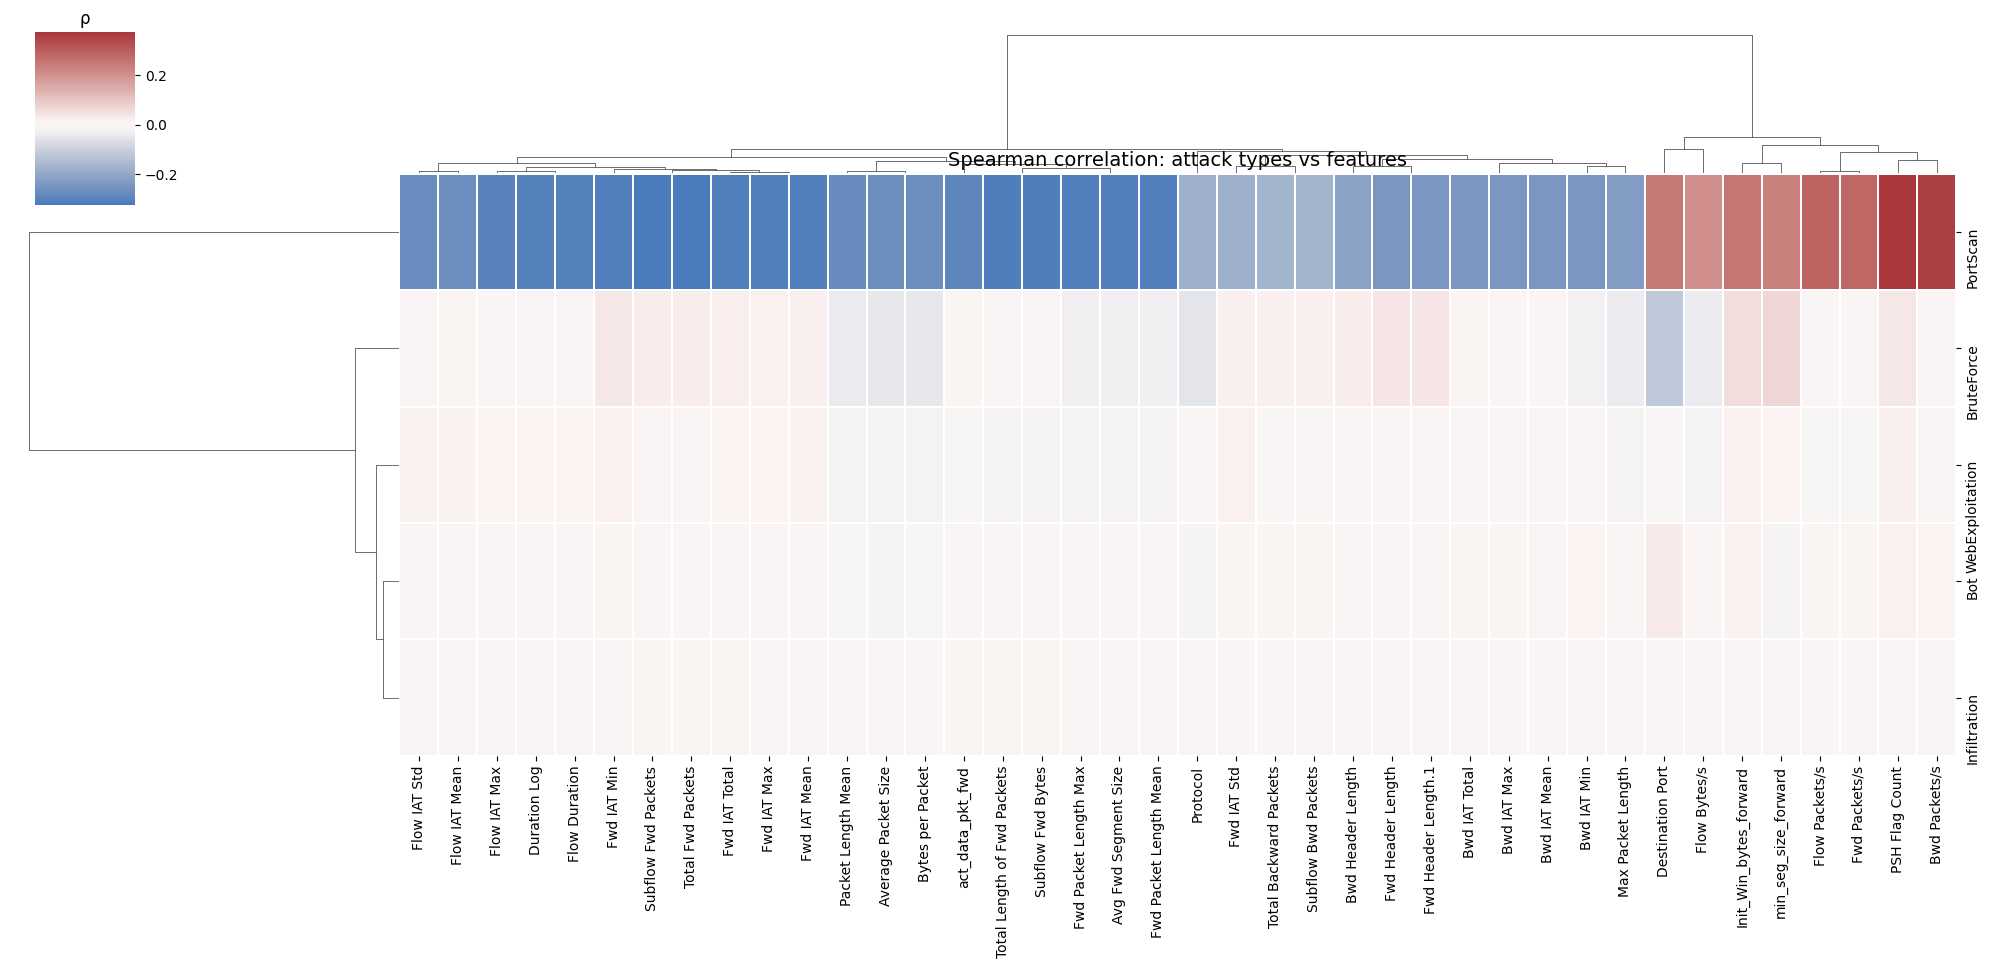

In [ ]:
if 'df_full' not in globals():
    df_full = load_full_dataset()
    df_full.columns = df_full.columns.str.strip()

def map_to_group(label: str) -> str:
    if label == 'BENIGN':
        return 'BENIGN'
    dos_variants = {'DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'DoS Slowhttptest', 'DDoS'}
    if label in dos_variants:
        return 'DoS/DDoS'
    if label == 'PortScan':
        return 'PortScan'
    if label in {'FTP-Patator', 'SSH-Patator', 'Web Attack - Brute Force'}:
        return 'BruteForce'
    if label in {'Web Attack - XSS', 'Web Attack - SQL Injection', 'Heartbleed'}:
        return 'WebExploitation'
    if label == 'Bot':
        return 'Bot'
    if label == 'Infiltration':
        return 'Infiltration'
    return 'Other'

if 'AggGroup' not in df_full.columns:
    df_full['AggGroup'] = df_full['Label'].apply(map_to_group)

# Parameters
label_axis = 'AggGroup'
groups_order = ['DoS/DDoS', 'PortScan', 'BruteForce', 'WebExploitation', 'Bot', 'Infiltration']
include_benign = False
top_k_features = 40

groups = groups_order.copy()
if include_benign and 'BENIGN' in df_full[label_axis].unique():
    groups = groups + ['BENIGN']

# Numeric features only
X = df_full.select_dtypes(include=[np.number]).copy()
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Filter features with at least min_unique unique values
min_unique = 2
num_cols = [c for c in X.columns if X[c].nunique(dropna=True) >= min_unique]

# Compute Spearman correlation per group
corr_mat = pd.DataFrame(index=groups, columns=num_cols, dtype=float)

for g in groups:
    y = (df_full[label_axis] == g).astype(int)
    for col in num_cols:
        col_series = X[col]
        valid = col_series.notna()  # pairwise NaN drop
        if valid.sum() < 3:
            corr_mat.at[g, col] = np.nan
        else:
            corr_mat.at[g, col] = col_series[valid].corr(y[valid], method='spearman')

# Keep top-k features by max absolute correlation across groups
importance = corr_mat.abs().max(axis=0)
top_cols = importance.sort_values(ascending=False).head(top_k_features).index
corr_top = corr_mat[top_cols].dropna(axis=1, how='all')

corr_top = corr_mat[top_cols].dropna(axis=1, how='all').dropna(axis=0, how='all')
corr_top_filled = corr_top.fillna(0)

# Clustered heatmap
cg = sns.clustermap(
    corr_top,
    cmap='vlag',
    center=0.0,
    linewidths=0.3,
    figsize=(max(10, min(22, 0.35*len(top_cols)+6)), 6 + 0.6*len(groups)),
    col_cluster=True,
    row_cluster=True
)
cg.ax_heatmap.set_title('Spearman correlation: attack types vs features', fontsize=14)
cg.cax.set_title('ρ')
plt.savefig('saved_matplotlib/1_5/1_correlation_attack_features.png', dpi=300, bbox_inches='tight')
plt.show()

#### 1.6 Even more computationally expensive

Starting pairwise Spearman | labels=14 | features=85
[1/14] Bot: rows=2,274,654 (benign=2,272,688, attack=1,966)
         top |ρ|: Destination Port=0.035, Init_Win_bytes_backward=0.028, Protocol=0.026, PSH Flag Count=0.025, Average Packet Size=0.023
[2/14] DDoS: rows=2,400,715 (benign=2,272,688, attack=128,027)
         top |ρ|: Fwd IAT Std=0.289, Bwd Packet Length Std=0.275, Flow IAT Std=0.259, act_data_pkt_fwd=0.239, Flow IAT Max=0.236
[3/14] DoS GoldenEye: rows=2,282,981 (benign=2,272,688, attack=10,293)
         top |ρ|: Idle Min=0.117, Idle Mean=0.115, Idle Max=0.114, Bwd Packet Length Std=0.099, Flow Packets/s=0.090
[4/14] DoS Hulk: rows=2,502,812 (benign=2,272,688, attack=230,124)
         top |ρ|: Idle Max=0.393, Idle Mean=0.393, Idle Min=0.392, Bwd Packet Length Std=0.377, FIN Ratio=0.352
[5/14] DoS Slowhttptest: rows=2,278,187 (benign=2,272,688, attack=5,499)
         top |ρ|: Active Mean=0.086, Active Max=0.086, Idle Max=0.085, Idle Mean=0.085, Idle Std=0.084
[6/14] DoS slow

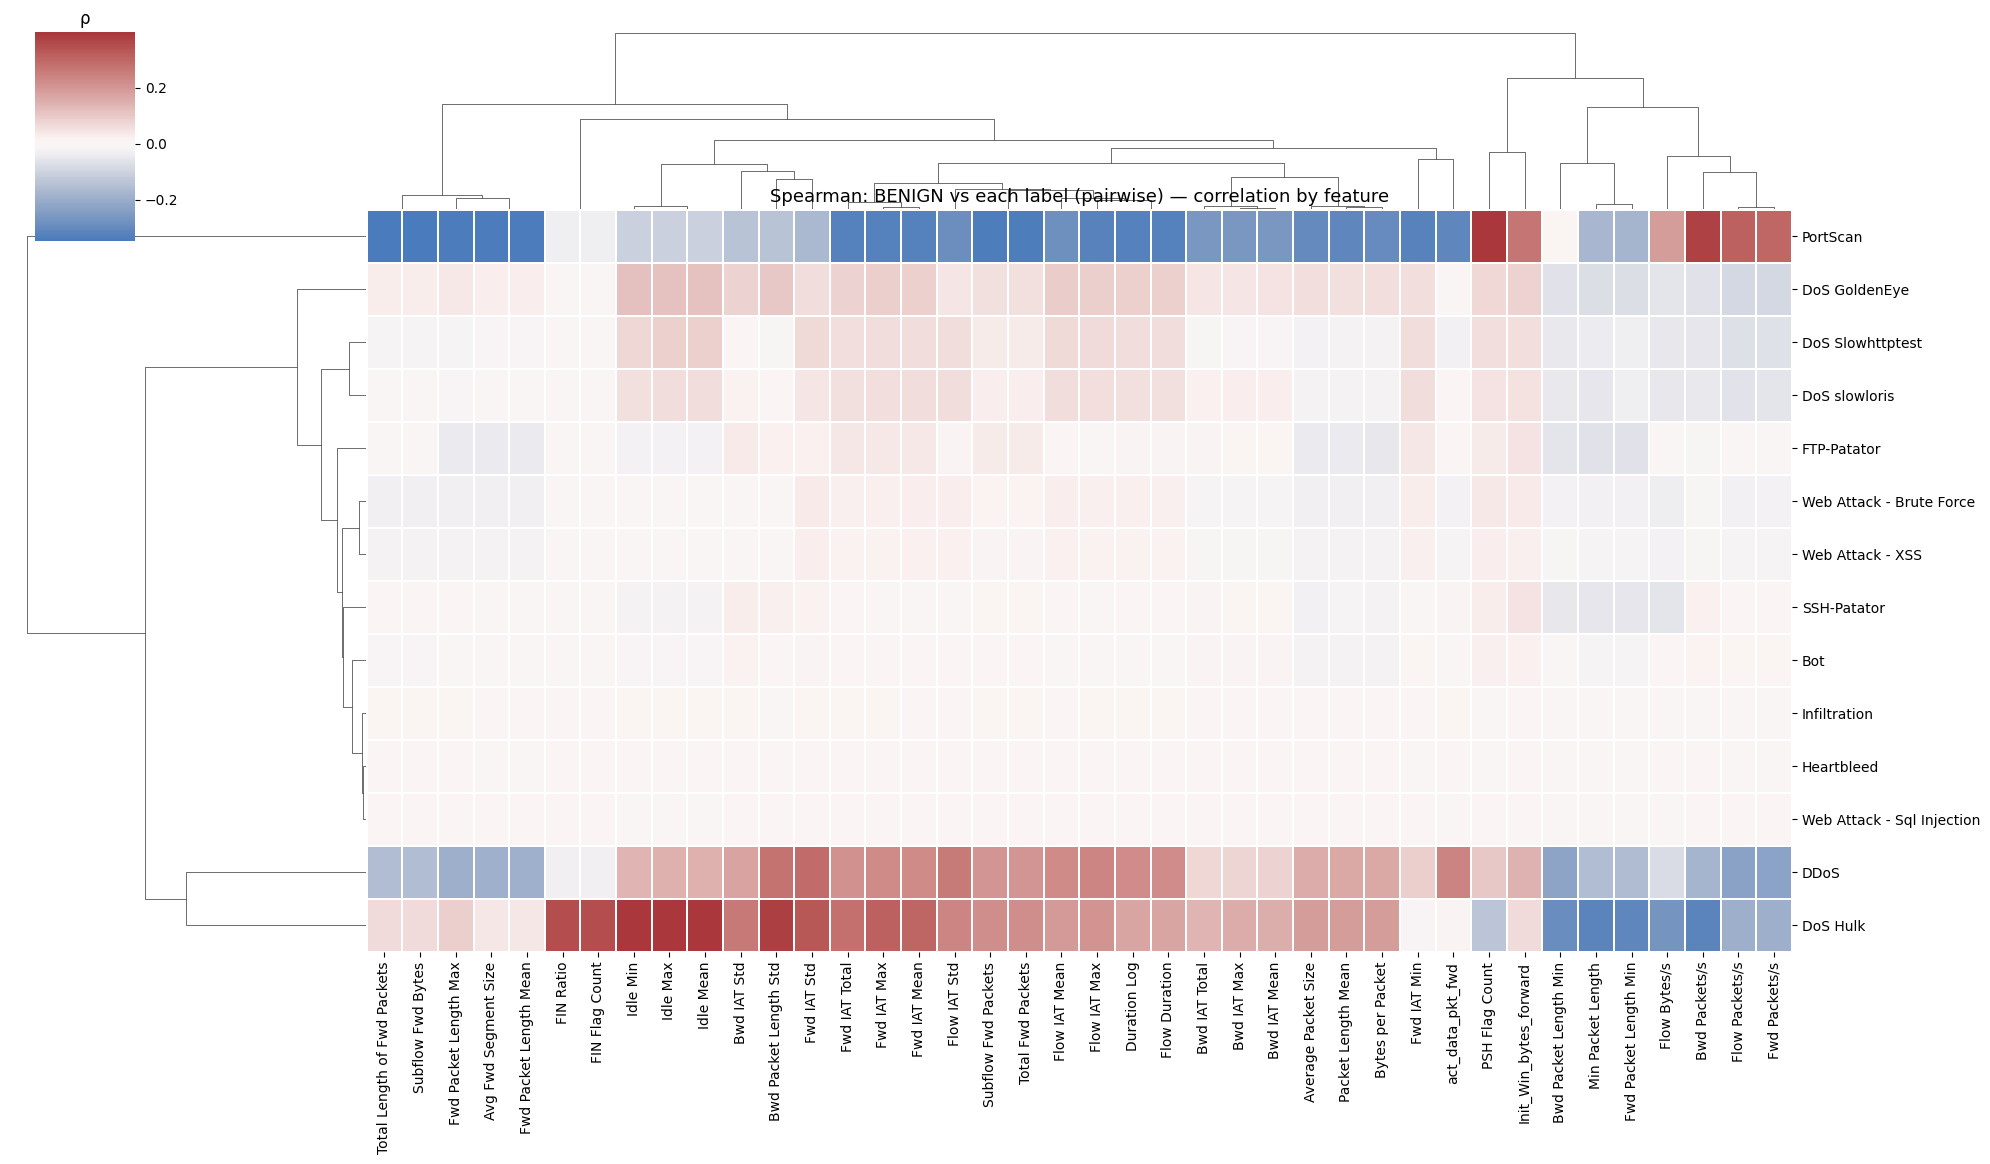

In [32]:
if 'df_full' not in globals():
    df_full = load_full_dataset()
    df_full.columns = df_full.columns.str.strip()

label_axis = 'Label'
top_k_features = 40
min_valid = 3  # min non-NaN pairs to compute corr
min_unique = 2  # drop features with <2 unique values in subset
balance_classes = False  # if True, downsample BENIGN to attack size per pair

labels = [l for l in sorted(df_full[label_axis].dropna().unique()) if l != 'BENIGN']
if not labels:
    print("No non-BENIGN labels found.")
else:
    # Numeric features only
    X_all = df_full.select_dtypes(include=[np.number]).copy()
    X_all.replace([np.inf, -np.inf], np.nan, inplace=True)
    num_cols = [c for c in X_all.columns if df_full[c].notna().any()]

    print(f"Starting pairwise Spearman | labels={len(labels)} | features={len(num_cols)}")
    t0 = time.time()

    corr_mat = pd.DataFrame(index=labels, columns=num_cols, dtype=float)

    for i, lab in enumerate(labels, 1):
        df_pair = df_full[df_full[label_axis].isin(['BENIGN', lab])].copy()
        if df_pair.empty or df_pair[label_axis].nunique() < 2:
            print(f"[B.8 {i}/{len(labels)}] {lab}: skipped (no data or single class)")
            continue

        n_attack = int((df_pair[label_axis] == lab).sum())
        n_benign = int((df_pair[label_axis] == 'BENIGN').sum())

        if balance_classes and n_attack > 0 and n_benign > 0:
            benign_idx = df_pair[df_pair[label_axis] == 'BENIGN'].sample(
                n=min(n_attack, n_benign),
                random_state=42
            ).index
            attack_idx = df_pair[df_pair[label_axis] == lab].index
            df_pair = df_pair.loc[benign_idx.union(attack_idx)].copy()
            n_attack = int((df_pair[label_axis] == lab).sum())
            n_benign = int((df_pair[label_axis] == 'BENIGN').sum())

        print(f"[{i}/{len(labels)}] {lab}: rows={len(df_pair):,} (benign={n_benign:,}, attack={n_attack:,})", flush=True)

        y = (df_pair[label_axis] == lab).astype(int)

        for col in num_cols:
            if col not in df_pair.columns:
                corr_mat.at[lab, col] = np.nan
                continue
            s = pd.to_numeric(df_pair[col], errors='coerce')
            s.replace([np.inf, -np.inf], np.nan, inplace=True)
            valid = s.notna() & y.notna()
            if valid.sum() < min_valid or s[valid].nunique(dropna=True) < min_unique or y[valid].nunique() < 2:
                corr_mat.at[lab, col] = np.nan
                continue
            corr_mat.at[lab, col] = s[valid].corr(y[valid], method='spearman')

        # Print top-|rho| features for this label
        row_abs = corr_mat.loc[lab].dropna().abs().sort_values(ascending=False)
        if not row_abs.empty:
            top_local = row_abs.head(min(5, len(row_abs)))
            tops = ", ".join([f"{k}={v:.3f}" for k, v in top_local.items()])
            print(f"         top |ρ|: {tops}", flush=True)
        else:
            print("         top |ρ|: none (all NaN)", flush=True)

    print("Selecting top features across labels...")
    importance = corr_mat.abs().max(axis=0)
    top_cols = importance.sort_values(ascending=False).head(top_k_features).index
    corr_top = corr_mat[top_cols].dropna(axis=1, how='all')

    if corr_top.empty:
        print("No valid correlations computed.")
    else:
        print(f"Plotting heatmap | kept_cols={corr_top.shape[1]} | labels={corr_top.shape[0]}")
        os.makedirs('saved', exist_ok=True)
        cg = sns.clustermap(
            corr_top,
            cmap='vlag',
            center=0.0,
            linewidths=0.3,
            figsize=(max(10, min(22, 0.35*len(top_cols)+6)), 6 + 0.4*len(labels)),
            col_cluster=True,
            row_cluster=True
        )
        cg.ax_heatmap.set_title('Spearman: BENIGN vs each label (pairwise) — correlation by feature', fontsize=13)
        cg.cax.set_title('ρ')
        plt.savefig('saved_matplotlib/1_6/1_benign_vs_label_spearman_corr_heatmap.png', dpi=300, bbox_inches='tight')
        plt.show()

#### 1.7 Another version of 1.6, improved performance

**Strong Positive Correlation (ρ ≈ +1.0, p < 0.05)** \
 Example: DDoS and Flow Packets/s
- Attack consistently has higher values than BENIGN
- Feature is a strong discriminator for this attack type


**Strong Negative Correlation (ρ ≈ -1.0, p < 0.05)** \
Example: Infiltration and Flow Duration
- Attack has lower values than BENIGN
- Still useful for detection (opposite pattern)

**Moderate Correlation (|ρ| ≈ 0.5 to 0.8, p < 0.05)** \
Weak/No Correlation (|ρ| ≈ 0 or p ≥ 0.05)
- Feature doesn't reliably distinguish attack from BENIGN
- Less useful for machine learning models

Starting pairwise Spearman | labels=14 | features=85
Config: balance_classes=True, max_benign=100,000, alpha=0.05
[1/14] Bot: rows=3,932 (benign=1,966/2,272,688, attack=1,966)
         top |ρ| (p<0.05): Destination Port=0.590(p=0.0e+00), Protocol=-0.538(p=4.5e-294), Init_Win_bytes_backward=0.422(p=3.1e-169), Average Packet Size=-0.396(p=5.7e-148), Init_Win_bytes_forward=0.392(p=6.9e-145)
[2/14] DDoS: rows=228,027 (benign=100,000/2,272,688, attack=128,027)
         top |ρ| (p<0.05): Bwd Packet Length Min=-0.622(p=0.0e+00), min_seg_size_forward=-0.585(p=0.0e+00), Flow IAT Std=0.561(p=0.0e+00), Fwd IAT Std=0.558(p=0.0e+00), Protocol=-0.552(p=0.0e+00)
[3/14] DoS GoldenEye: rows=20,586 (benign=10,293/2,272,688, attack=10,293)
         top |ρ| (p<0.05): Flow Packets/s=-0.665(p=0.0e+00), Flow IAT Mean=0.664(p=0.0e+00), Fwd Packets/s=-0.657(p=0.0e+00), Flow IAT Max=0.650(p=0.0e+00), Fwd Packet Length Min=-0.645(p=0.0e+00)
[4/14] DoS Hulk: rows=330,124 (benign=100,000/2,272,688, attack=230,124)

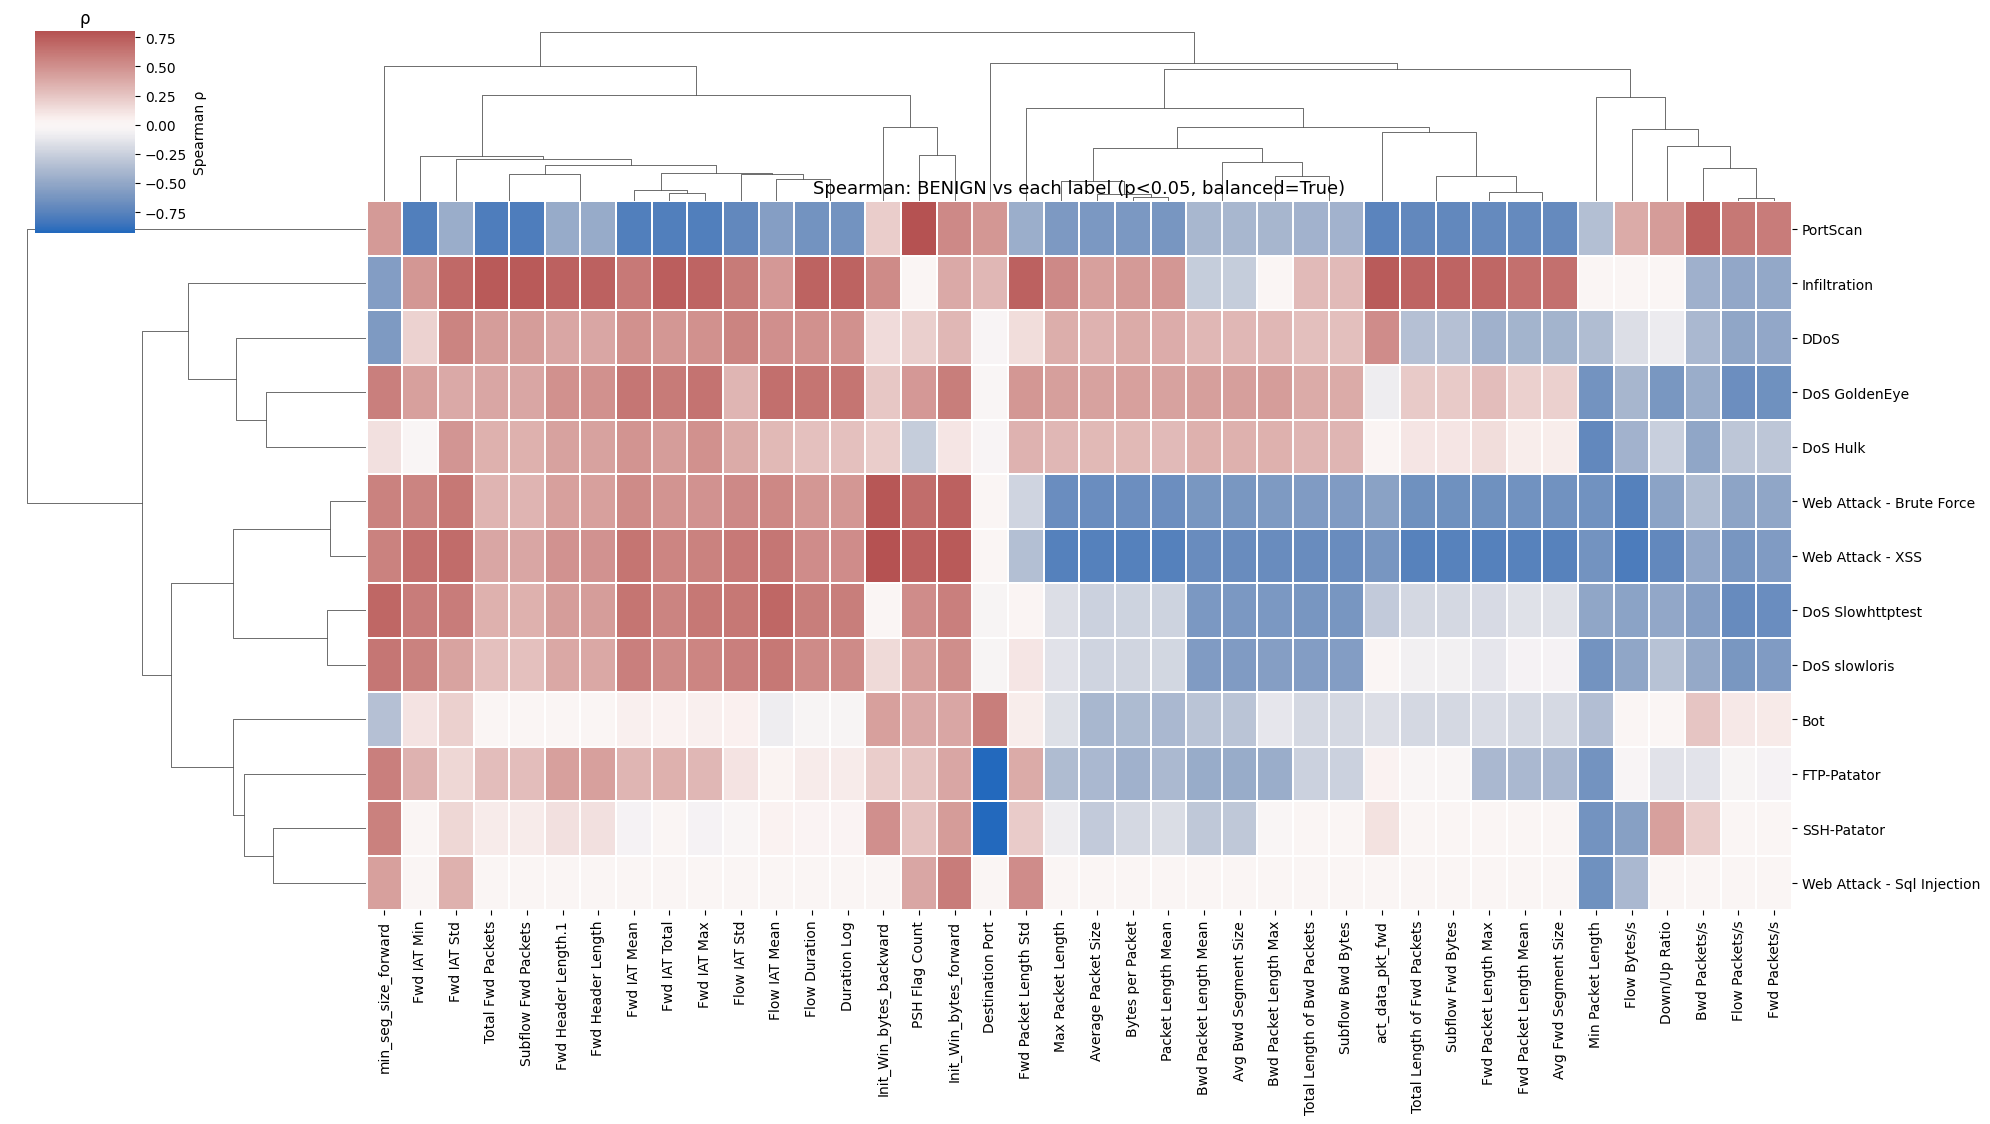

Clustermap generated.
Generating overlay heatmap...


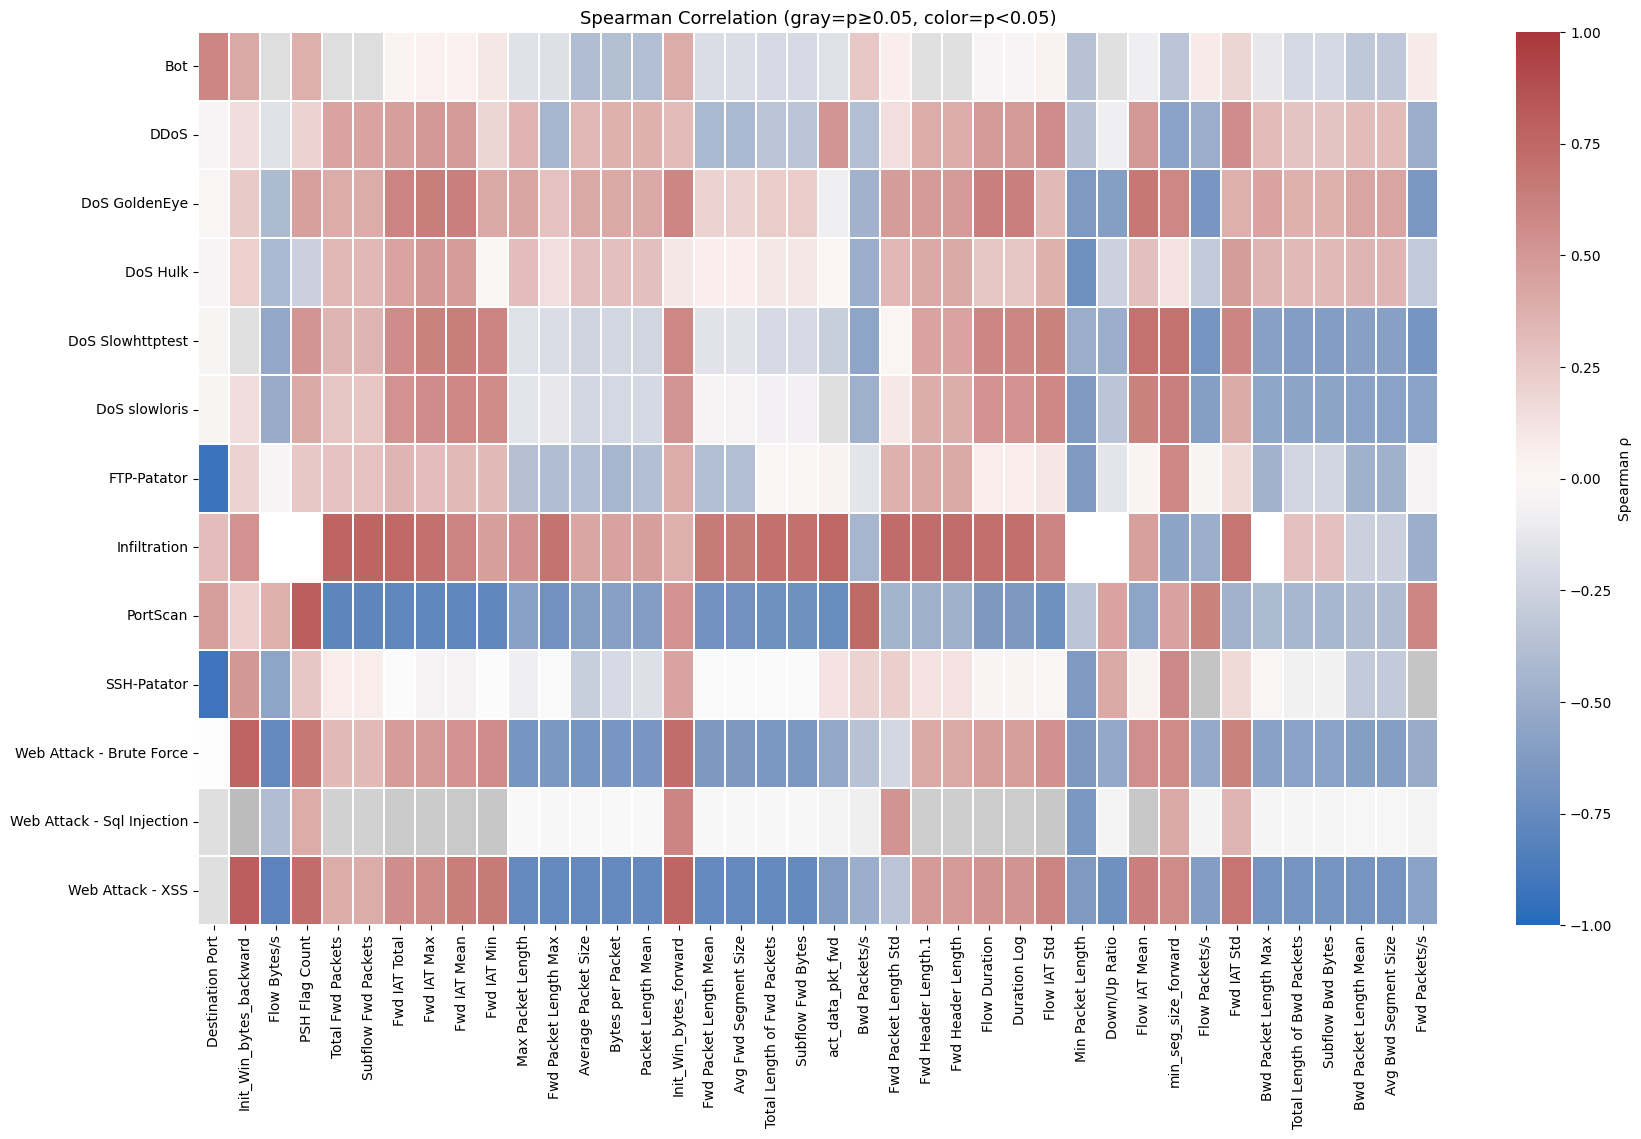


=== SUMMARY STATISTICS ===
Total attack types processed: 14
Features analyzed: 85
Significant correlations (p<0.05): 849
Top 5 strongest absolute correlations across all attacks:
  FTP-Patator                    | Destination Port                         | ρ=-0.928 | p=0.00e+00
  SSH-Patator                    | Destination Port                         | ρ=-0.921 | p=0.00e+00
  Web Attack - XSS               | Init_Win_bytes_backward                  | ρ=+0.800 | p=2.39e-291
  Web Attack - XSS               | Flow Bytes/s                             | ρ=-0.799 | p=2.00e-289
  PortScan                       | PSH Flag Count                           | ρ=+0.799 | p=0.00e+00


In [4]:
# IMPROVEMENTS:
# Class balancing, statistical testing, p-values, logging, enhanced thresholds

if 'df_full' not in globals():
    df_full = load_full_dataset()
    df_full.columns = df_full.columns.str.strip()

label_axis = 'Label'
top_k_features = 40
min_valid = 30 # change: increased from 2 to 30
min_unique = 2
balance_classes = True # change: true here
max_benign_per_attack = 100000 # new: cap on BENIGN samples per attack
alpha = 0.05 # new: significance level

labels = [l for l in sorted(df_full[label_axis].dropna().unique()) if l != 'BENIGN']
if not labels:
    print("No non-BENIGN labels found.")
else:
    # Numeric features only
    X_all = df_full.select_dtypes(include=[np.number]).copy()
    X_all.replace([np.inf, -np.inf], np.nan, inplace=True)
    num_cols = [c for c in X_all.columns if df_full[c].notna().any()]

    print(f"Starting pairwise Spearman | labels={len(labels)} | features={len(num_cols)}")
    print(f"Config: balance_classes={balance_classes}, max_benign={max_benign_per_attack:,}, alpha={alpha}")
    t0 = time.time()

    corr_mat = pd.DataFrame(index=labels, columns=num_cols, dtype=float)
    pval_mat = pd.DataFrame(index=labels, columns=num_cols, dtype=float)

    sample_sizes = []

    for i, lab in enumerate(labels, 1):
        df_pair = df_full[df_full[label_axis].isin(['BENIGN', lab])].copy()
        if df_pair.empty or df_pair[label_axis].nunique() < 2:
            print(f"[{i}/{len(labels)}] {lab}: skipped (no data or single class)")
            continue

        n_attack_orig = int((df_pair[label_axis] == lab).sum())
        n_benign_orig = int((df_pair[label_axis] == 'BENIGN').sum())

        # IMPROVED BALANCING LOGIC
        if balance_classes and n_attack_orig > 0 and n_benign_orig > 0:
            # Cap BENIGN to reasonable size, then balance to attack count
            max_benign_sample = min(max_benign_per_attack, n_benign_orig)
            n_benign_target = min(n_attack_orig, max_benign_sample)

            benign_idx = df_pair[df_pair[label_axis] == 'BENIGN'].sample(
                n=n_benign_target,
                random_state=42
            ).index
            attack_idx = df_pair[df_pair[label_axis] == lab].index
            df_pair = df_pair.loc[benign_idx.union(attack_idx)].copy()

            n_attack = int((df_pair[label_axis] == lab).sum())
            n_benign = int((df_pair[label_axis] == 'BENIGN').sum())
        else:
            n_attack = n_attack_orig
            n_benign = n_benign_orig

        print(f"[{i}/{len(labels)}] {lab}: rows={len(df_pair):,} (benign={n_benign:,}/{n_benign_orig:,}, attack={n_attack:,})", flush=True)

        # new: Store sample sizes
        sample_sizes.append({
            'Label': lab,
            'Attack_Count': n_attack,
            'Benign_Count': n_benign,
            'Attack_Original': n_attack_orig,
            'Benign_Original': n_benign_orig,
            'Balanced': balance_classes
        })

        y = (df_pair[label_axis] == lab).astype(int)

        for col in num_cols:
            if col not in df_pair.columns:
                corr_mat.at[lab, col] = np.nan
                pval_mat.at[lab, col] = np.nan
                continue

            s = pd.to_numeric(df_pair[col], errors='coerce')
            s.replace([np.inf, -np.inf], np.nan, inplace=True)
            valid = s.notna() & y.notna()

            n_valid = valid.sum()
            n_unique = s[valid].nunique(dropna=True)
            y_unique = y[valid].nunique()

            if n_valid < min_valid or n_unique < min_unique or y_unique < 2:
                corr_mat.at[lab, col] = np.nan
                pval_mat.at[lab, col] = np.nan
                continue

            # new: Check for excessive ties
            tie_ratio = 1 - (n_unique / n_valid)
            if tie_ratio > 0.7:
                print(f"         Warning: {col} has {tie_ratio:.1%} tied values", flush=True)

            # change: Use spearmanr to get both rho and p-value
            try:
                rho, pval = spearmanr(s[valid], y[valid])
                corr_mat.at[lab, col] = rho
                pval_mat.at[lab, col] = pval
            except Exception as e:
                print(f"         Error computing correlation for {col}: {e}", flush=True)
                corr_mat.at[lab, col] = np.nan
                pval_mat.at[lab, col] = np.nan

        row_abs = corr_mat.loc[lab].copy()
        row_pvals = pval_mat.loc[lab].copy()

        # new: Filter by significance
        significant_mask = row_pvals < alpha
        row_abs_sig = row_abs[significant_mask].dropna().abs().sort_values(ascending=False)

        if not row_abs_sig.empty:
            top_local = row_abs_sig.head(min(5, len(row_abs_sig)))
            tops = ", ".join([f"{k}={corr_mat.loc[lab, k]:.3f}(p={pval_mat.loc[lab, k]:.1e})" for k in top_local.index])
            print(f"         top |ρ| (p<{alpha}): {tops}", flush=True)
        else:
            print(f"         top |ρ| (p<{alpha}): none significant", flush=True)

    corr_mat.to_csv('saved_matplotlib/1_7/pairwise_spearman_correlations.csv', index=True)
    print("Saved full correlation matrix to saved_matplotlib/1_7/pairwise_spearman_correlations.csv")

    pval_mat.to_csv('saved_matplotlib/1_7/pairwise_spearman_pvalues.csv', index=True)
    print("Saved p-values to saved_matplotlib/1_7/pairwise_spearman_pvalues.csv")

    # new: Export sample sizes
    sample_sizes_df = pd.DataFrame(sample_sizes)
    sample_sizes_df.to_csv('saved_matplotlib/1_7/attack_sample_sizes.csv', index=False)
    print("Saved sample sizes to saved_matplotlib/1_7/attack_sample_sizes.csv")


    print("Selecting top features across labels...")
    importance = corr_mat.abs().max(axis=0)
    top_cols = importance.sort_values(ascending=False).head(top_k_features).index

    # new: work on top features only
    corr_top = corr_mat[top_cols].copy()
    pval_top = pval_mat[top_cols].copy()

    # mask non-significant correlations
    sig_mask = pval_top < alpha
    corr_top_sig = corr_top.where(sig_mask, np.nan)

    corr_top_sig = corr_top_sig.dropna(axis=1, how='all').dropna(axis=0, how='all')

    if corr_top_sig.empty:
        print(f"No significant correlations (p<{alpha}) found for visualization.")
    else:
        corr_top_sig_filled = corr_top_sig.fillna(0)

        # without clustering
        if corr_top_sig_filled.shape[0] < 2 or corr_top_sig_filled.shape[1] < 2:
            print(f"Not enough data for clustering (rows={corr_top_sig_filled.shape[0]}, cols={corr_top_sig_filled.shape[1]})")
            print("Generating simple heatmap without clustering...")

            plt.figure(figsize=(max(10, min(22, 0.35*len(corr_top_sig.columns)+6)), 6 + 0.4*len(corr_top_sig.index)))
            sns.heatmap(
                corr_top_sig,
                cmap='vlag',
                center=0.0,
                linewidths=0.3,
                cbar_kws={'label': 'Spearman ρ'}
            )
            plt.title(f'Spearman: BENIGN vs each label (p<{alpha}, balanced={balance_classes})', fontsize=13)
            out_path_sig = 'saved_matplotlib/1_7/benign_vs_label_spearman_corr_significant.png'
            plt.savefig(out_path_sig, dpi=600, bbox_inches='tight')
            plt.show()
            print("Simple heatmap generated.")
        # with clustering
        else:
            print(f"Plotting heatmap | kept_cols={corr_top_sig_filled.shape[1]} | labels={corr_top_sig_filled.shape[0]}")
            try:
                cg = sns.clustermap(
                    corr_top_sig_filled,  # fix: Use filled version
                    cmap='vlag',
                    center=0.0,
                    linewidths=0.3,
                    figsize=(max(10, min(22, 0.35*len(corr_top_sig_filled.columns)+6)), 6 + 0.4*len(corr_top_sig_filled.index)),
                    col_cluster=True,
                    row_cluster=True,
                    cbar_kws={'label': 'Spearman ρ'},
                    metric='euclidean',  # fix: Specify metric explicitly
                    method='average'     # fix: Specify linkage method
                )
                cg.ax_heatmap.set_title(f'Spearman: BENIGN vs each label (p<{alpha}, balanced={balance_classes})', fontsize=13)
                cg.cax.set_title('ρ')
                out_path_sig = 'saved_matplotlib/1_7/benign_vs_label_spearman_corr_significant.png'
                plt.savefig(out_path_sig, dpi=600, bbox_inches='tight')
                plt.show()
                print("Clustermap generated.")
            except Exception as e:
                print(f"Clustering failed: {e}")
                print("Generating simple heatmap without clustering...")

                plt.figure(figsize=(max(10, min(22, 0.35*len(corr_top_sig.columns)+6)), 6 + 0.4*len(corr_top_sig.index)))
                sns.heatmap(
                    corr_top_sig,
                    cmap='vlag',
                    center=0.0,
                    linewidths=0.3,
                    cbar_kws={'label': 'Spearman ρ'}
                )
                plt.title(f'Spearman: BENIGN vs each label (p<{alpha}, balanced={balance_classes})', fontsize=13)
                out_path_sig = 'saved_matplotlib/1_7/benign_vs_label_spearman_corr_significant.png'
                plt.savefig(out_path_sig, dpi=600, bbox_inches='tight')
                plt.show()
                print("Simple heatmap generated.")

        print("Generating overlay heatmap...")
        fig, ax = plt.subplots(figsize=(max(10, min(22, 0.35*len(top_cols)+6)), 6 + 0.4*len(labels)))

        sns.heatmap(
            corr_top,
            cmap='Greys',
            center=0.0,
            linewidths=0.3,
            ax=ax,
            cbar=False,
            vmin=-1,
            vmax=1,
            alpha=0.3
        )

        sns.heatmap(
            corr_top_sig,
            cmap='vlag',
            center=0.0,
            linewidths=0.3,
            ax=ax,
            cbar_kws={'label': 'Spearman ρ'},
            vmin=-1,
            vmax=1
        )

        ax.set_title(f'Spearman Correlation (gray=p≥{alpha}, color=p<{alpha})', fontsize=13)
        out_path_all = 'saved_matplotlib/1_7/benign_vs_label_spearman_corr_all_with_significance.png'
        plt.savefig(out_path_all, dpi=600, bbox_inches='tight')
        plt.show()


    print("\n=== SUMMARY STATISTICS ===")
    print(f"Total attack types processed: {len(labels)}")
    print(f"Features analyzed: {len(num_cols)}")
    print(f"Significant correlations (p<{alpha}): {(pval_mat < alpha).sum().sum()}")
    print(f"Top 5 strongest absolute correlations across all attacks:")

    corr_flat = []
    for lab in labels:
        for feat in num_cols:
            rho = corr_mat.at[lab, feat]
            pval = pval_mat.at[lab, feat]
            if pd.notna(rho) and pd.notna(pval):
                corr_flat.append({
                    'Label': lab,
                    'Feature': feat,
                    'Spearman_rho': rho,
                    'p_value': pval,
                    'abs_rho': abs(rho)
                })

    corr_flat_df = pd.DataFrame(corr_flat)
    if not corr_flat_df.empty:
        top_5_overall = corr_flat_df.nlargest(5, 'abs_rho')
        for _, row in top_5_overall.iterrows():
            print(f"  {row['Label']:30s} | {row['Feature']:40s} | ρ={row['Spearman_rho']:+.3f} | p={row['p_value']:.2e}")

### **2 DoS/DDoS attacks**

C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\365213262.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




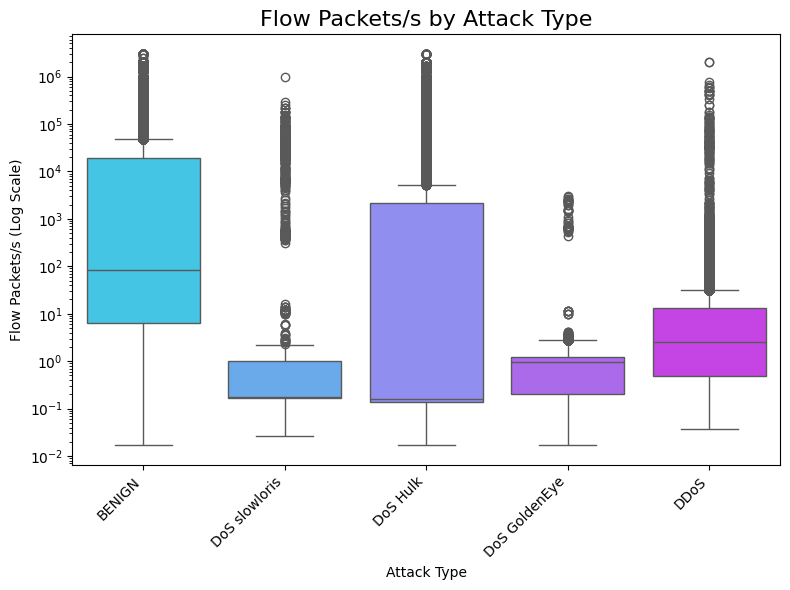

C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\365213262.py:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




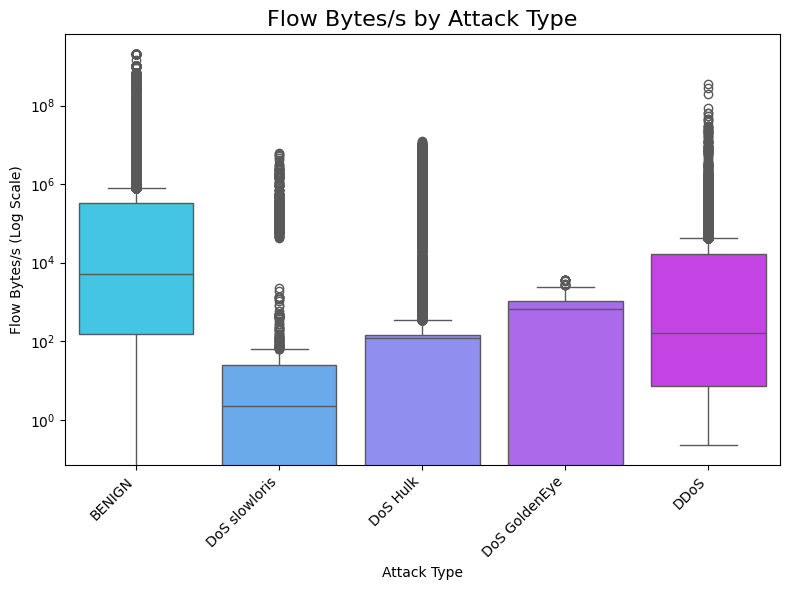

C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\365213262.py:58: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




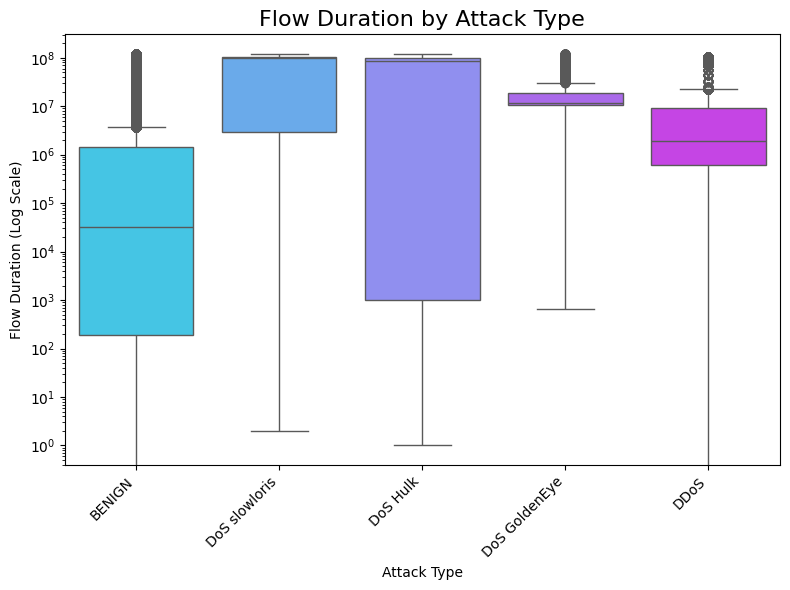

In [34]:
dos_ddos_attacks = ['DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'DoS Slowhttptest', 'DDoS']

df_wed = load_dataset('Wed')
df_wed.columns = df_wed.columns.str.strip()
df_wed = df_wed.dropna()

df_fri3 = load_dataset('Fri')
df_fri3.columns = df_fri3.columns.str.strip()
df_fri3 = df_fri3.dropna()

dos_labels = ['DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'BENIGN']
df_dos = df_wed[df_wed['Label'].isin(dos_labels)].copy()

ddos_labels = ['DDoS', 'BENIGN']
df_ddos = df_fri3[df_fri3['Label'].isin(ddos_labels)].copy()

dos_ddos_df = pd.concat([df_dos, df_ddos], ignore_index=True)

# Flow Packets/s
plt.figure(figsize=(8, 6))
colors_pkt = sns.color_palette('cool', len(dos_ddos_df['Label'].unique()))
sns.boxplot(
    x='Label',
    y='Flow Packets/s',
    data=dos_ddos_df,
    palette=colors_pkt
)
plt.title('Flow Packets/s by Attack Type', fontsize=16)
plt.yscale('log')
plt.xlabel('Attack Type')
plt.ylabel('Flow Packets/s (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('saved_matplotlib/2/flow_packets_per_second_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Flow Bytes/s
plt.figure(figsize=(8, 6))
colors_bytes = sns.color_palette('cool', len(dos_ddos_df['Label'].unique()))
sns.boxplot(
    x='Label',
    y='Flow Bytes/s',
    data=dos_ddos_df,
    palette=colors_bytes
)
plt.title('Flow Bytes/s by Attack Type', fontsize=16)
plt.yscale('log')
plt.xlabel('Attack Type')
plt.ylabel('Flow Bytes/s (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('saved_matplotlib/2/flow_bytes_per_second_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Flow Duration
plt.figure(figsize=(8, 6))
colors_dur = sns.color_palette('cool', len(dos_ddos_df['Label'].unique()))
sns.boxplot(
    x='Label',
    y='Flow Duration',
    data=dos_ddos_df,
    palette=colors_dur
)
plt.title('Flow Duration by Attack Type', fontsize=16)
plt.yscale('log')
plt.xlabel('Attack Type')
plt.ylabel('Flow Duration (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('saved_matplotlib/2/flow_duration_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

### **3 Port Scan attacks**

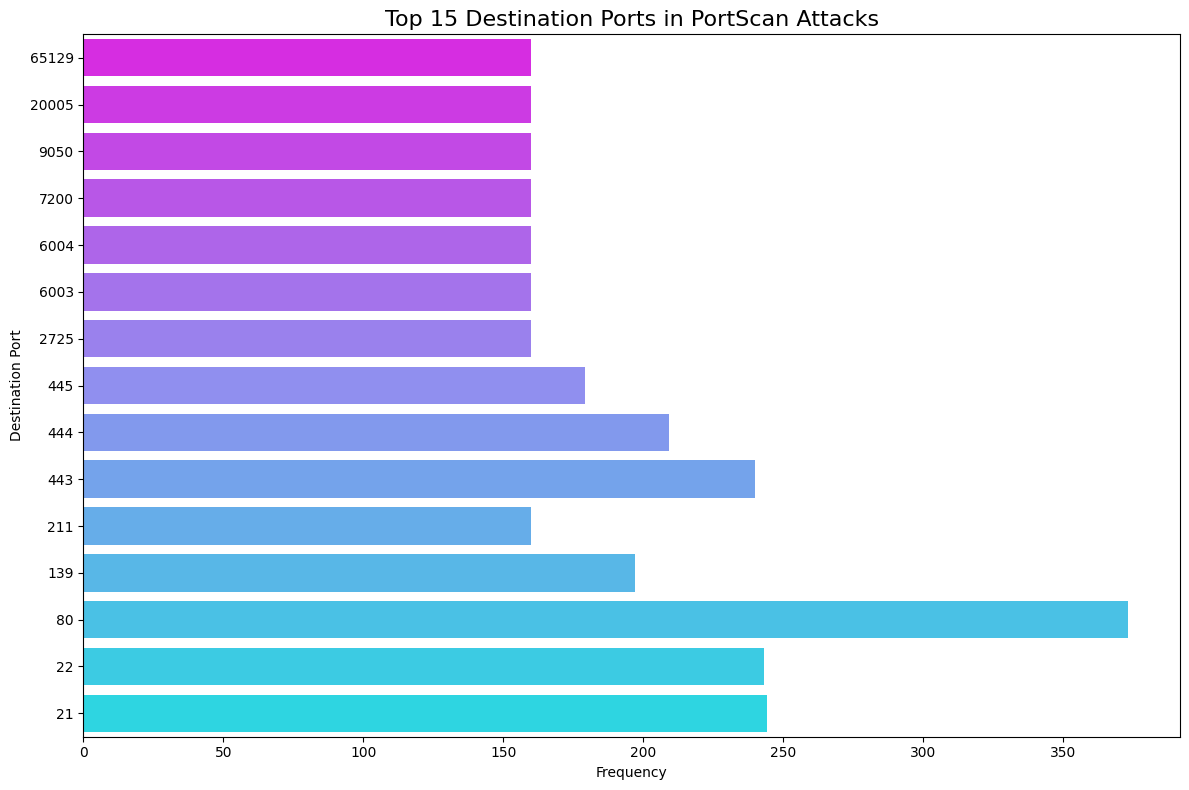

Top 15 targeted ports:

Destination Port
80       373
21       244
22       243
443      240
444      209
139      197
445      179
6003     160
7200     160
65129    160
211      160
9050     160
6004     160
20005    160
2725     160


Count groups (number of ports with the same frequency):
count
373      1
244      1
243      1
240      1
209      1
197      1
179      1
160    327
159    363
158    212
157     68
156     16
155      3
38       1
30       1
6        1
1        1
Unique attacker IP addresses: 1
172.16.0.1


In [35]:
df_fri = load_dataset('Fri')
df_fri.columns = df_fri.columns.str.strip()
df_ps = df_fri[df_fri['Label'] == 'PortScan'].copy()

# Get the value counts for destination ports
port_counts = df_ps['Destination Port'].value_counts()
top_n_ports = 15
top_ports = port_counts.nlargest(top_n_ports)
count_groups = port_counts.value_counts().sort_index(ascending=False)

# Bar chart of top n destination ports
plt.figure(figsize=(12, 8))
colors_ports = sns.color_palette('cool', n_colors=top_n_ports)
sns.barplot(
    x=top_ports.values,
    y=top_ports.index,
    hue=top_ports.index,
    palette=colors_ports,
    orient='h',
    legend=False
)
plt.title(f'Top {top_n_ports} Destination Ports in PortScan Attacks', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Destination Port')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('saved_matplotlib/3/portscan_top_destination_ports.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Top {top_n_ports} targeted ports:\n")
print(top_ports.to_string())

print("\n\nCount groups (number of ports with the same frequency):")
print(count_groups.to_string())

ip_addresses = df_ps['Source IP'].unique()
print(f"Unique attacker IP addresses: {len(ip_addresses)}")
for address in ip_addresses:
    print(address)

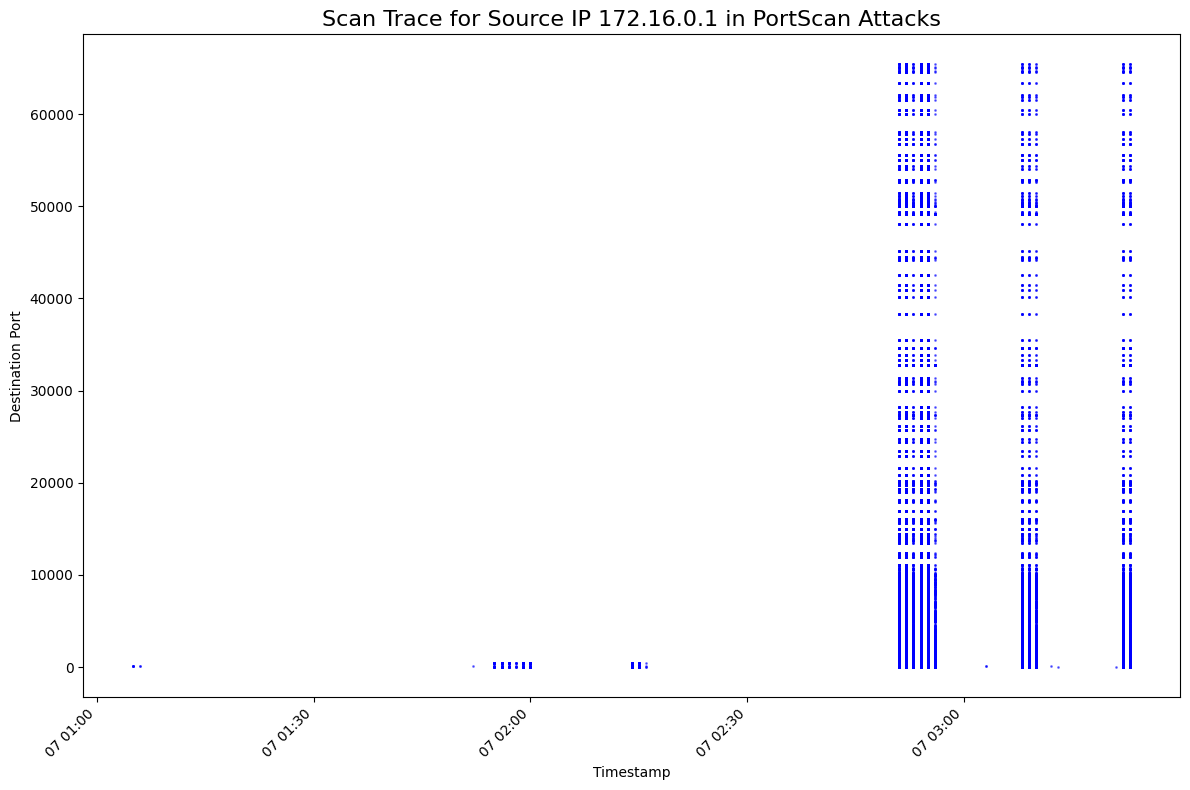

Selected Source IP: 172.16.0.1
Number of scans from this IP: 158930


In [36]:
df_fri = load_dataset('Fri')
df_fri.columns = df_fri.columns.str.strip()
df_ps = df_fri[df_fri['Label'] == 'PortScan'].copy()

ps_source_ip = "172.16.0.1"
df_single_ip = df_ps[df_ps['Source IP'] == ps_source_ip].copy()
df_single_ip = convert_to_datetime(df_single_ip)

# Scatter plot timestamp vs destination
plt.figure(figsize=(12, 8))
plt.scatter(df_single_ip['Timestamp'], df_single_ip['Destination Port'], s=1, alpha=0.5, color='blue')
plt.title(f'Scan Trace for Source IP {ps_source_ip} in PortScan Attacks', fontsize=16)
plt.xlabel('Timestamp')
plt.ylabel('Destination Port')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('saved_matplotlib/3/portscan_single_ip_trace.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Selected Source IP: {ps_source_ip}")
print(f"Number of scans from this IP: {len(df_single_ip)}")

### **4 Bruteforce attacks**


- Patator FTP
- Patator SSH
- Web Attack - Brute Force

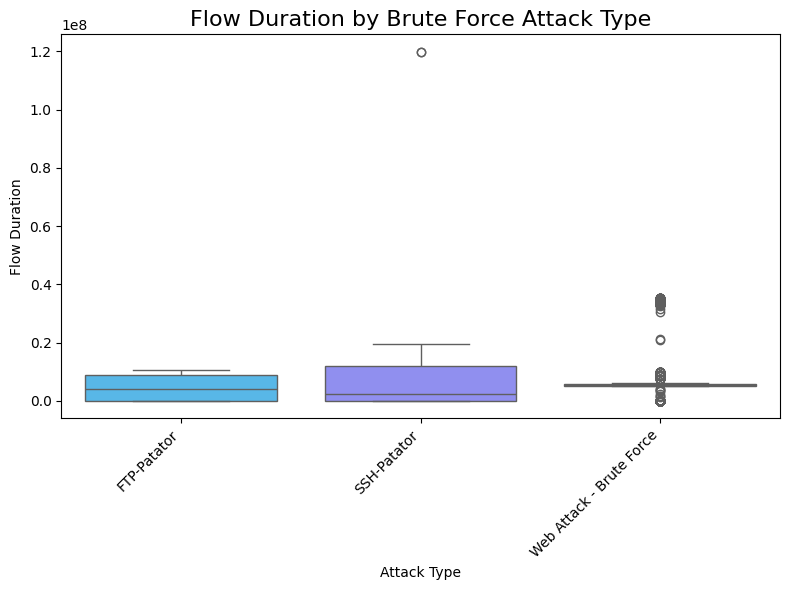

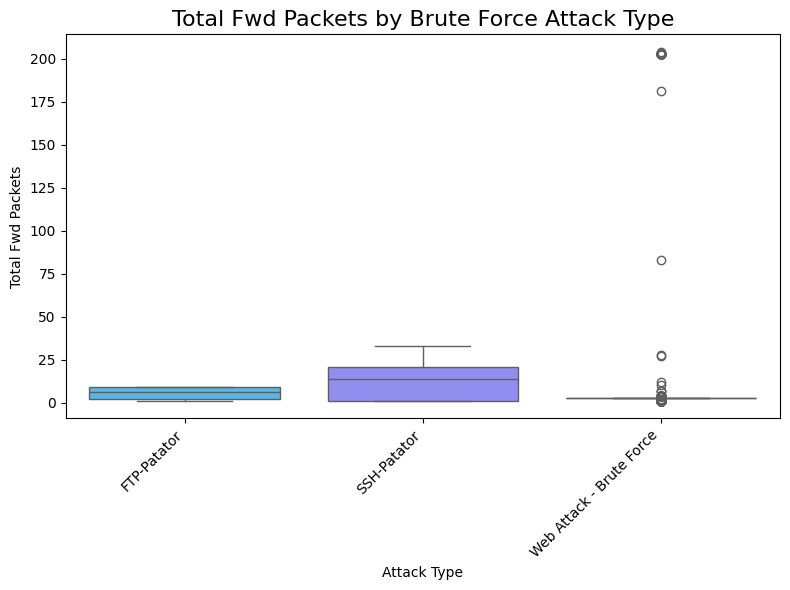

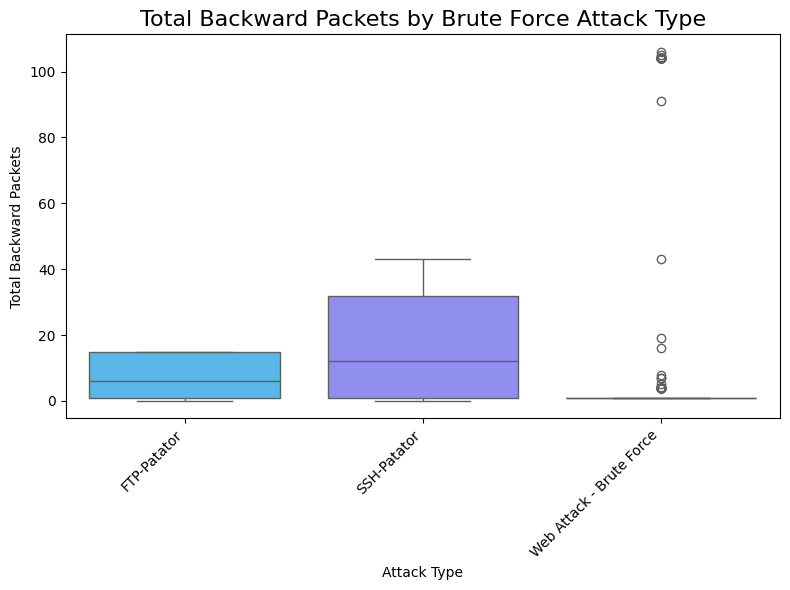

Unique attacker IP addresses: 1
172.16.0.1


In [37]:
df_tue = load_dataset('Tue')
df_thu = load_dataset('Thu')
df_tue_thu = pd.concat([df_tue, df_thu], ignore_index=True)
df_tue_thu.columns = df_tue_thu.columns.str.strip()
brute_labels = ['FTP-Patator', 'SSH-Patator', 'Web Attack - Brute Force']
df_brute = df_tue_thu[df_tue_thu['Label'].isin(brute_labels)].copy()

# Boxplot for flow duration
plt.figure(figsize=(8, 6))
colors_brute = sns.color_palette('cool', len(brute_labels))
sns.boxplot(
    x='Label',
    y='Flow Duration',
    data=df_brute,
    hue='Label',
    palette=colors_brute,
    legend=False
)
plt.title('Flow Duration by Brute Force Attack Type', fontsize=16)
plt.xlabel('Attack Type')
plt.ylabel('Flow Duration')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('saved_matplotlib/4/flow_duration_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Boxplot for total forward packets
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Label',
    y='Total Fwd Packets',
    data=df_brute,
    hue='Label',
    palette=colors_brute,
    legend=False
)
plt.title('Total Fwd Packets by Brute Force Attack Type', fontsize=16)
plt.xlabel('Attack Type')
plt.ylabel('Total Fwd Packets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('saved_matplotlib/4/total_fwd_packets_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Boxplot for total backward packets
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Label',
    y='Total Backward Packets',
    data=df_brute,
    hue='Label',
    palette=colors_brute,
    legend=False
)
plt.title('Total Backward Packets by Brute Force Attack Type', fontsize=16)
plt.xlabel('Attack Type')
plt.ylabel('Total Backward Packets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('saved_matplotlib/4/total_backward_packets_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

ip_addresses = df_brute['Source IP'].unique()
print(f"Unique attacker IP addresses: {len(ip_addresses)}")
for address in ip_addresses:
    print(address)

### **5 Bot attacks**

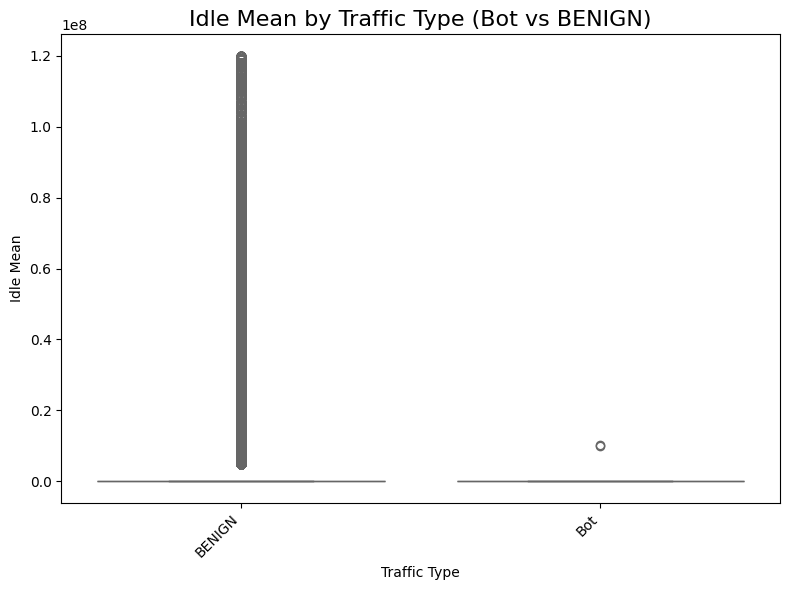

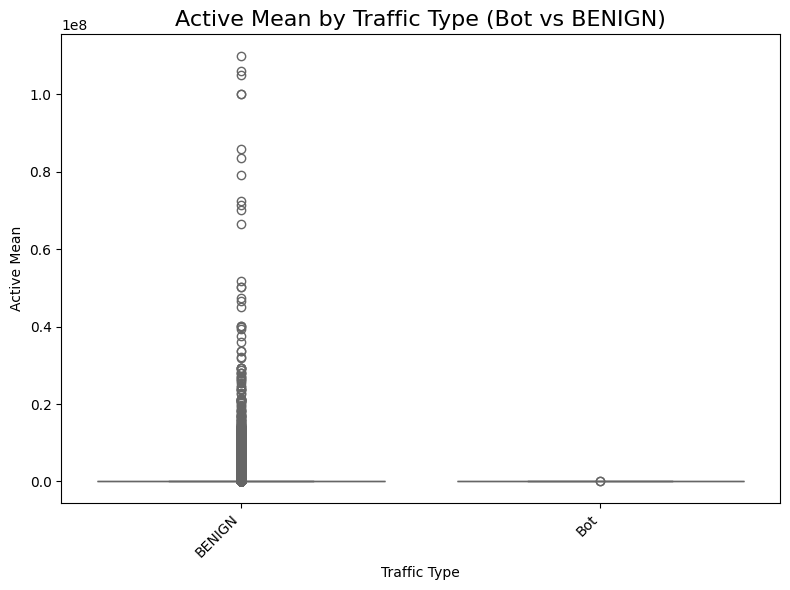

Unique source IP addresses in Bot traffic: 7098
192.168.10.50
8.6.0.1
192.168.10.9
192.168.10.3
192.168.10.25
192.168.10.14
192.168.10.5
192.168.10.51
192.168.10.8
192.168.10.17
64.4.27.50
13.78.188.147
64.4.54.254
220.243.219.55
72.21.91.29
52.10.50.117
52.84.145.172
65.152.202.208
13.82.187.188
64.4.54.36
134.170.51.247
23.15.4.8
52.11.17.245
52.36.207.192
35.165.158.113
23.36.33.93
210.157.19.63
206.126.112.141
172.217.10.238
104.16.27.216
35.167.184.4
35.164.51.247
69.89.74.100
52.84.3.76
52.84.145.248
184.84.243.218
184.84.243.202
216.58.219.206
52.11.31.31
52.43.87.30
23.199.172.161
104.97.95.20
8.253.154.120
23.15.4.24
157.240.18.19
157.240.18.35
23.203.252.93
104.27.214.30
104.27.215.30
172.217.3.106
104.17.61.91
104.19.196.102
172.217.10.104
40.77.228.69
192.124.249.5
172.217.12.206
80.247.66.26
64.4.54.18
52.40.81.184
65.55.138.126
23.194.182.93
52.84.140.85
52.84.140.31
52.43.9.103
23.194.182.11
104.20.170.20
72.5.205.53
199.193.119.50
52.84.145.242
72.5.205.62
23.50.75.27
2

In [38]:
df_fri = load_dataset('Fri')
df_fri.columns = df_fri.columns.str.strip()
bot_labels = ['Bot', 'BENIGN']
df_bot = df_fri[df_fri['Label'].isin(bot_labels)].copy()

# Boxplot for Idle Mean
plt.figure(figsize=(8, 6))
colors_bot = sns.color_palette('cool', len(bot_labels))
sns.boxplot(
    x='Label',
    y='Idle Mean',
    data=df_bot,
    hue='Label',
    palette=colors_bot,
    legend=False
)
plt.title('Idle Mean by Traffic Type (Bot vs BENIGN)', fontsize=16)
plt.xlabel('Traffic Type')
plt.ylabel('Idle Mean')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('saved_matplotlib/5/idle_mean_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Boxplot for Active Mean
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Label',
    y='Active Mean',
    data=df_bot,
    hue='Label',
    palette=colors_bot,
    legend=False
)
plt.title('Active Mean by Traffic Type (Bot vs BENIGN)', fontsize=16)
plt.xlabel('Traffic Type')
plt.ylabel('Active Mean')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('saved_matplotlib/5/active_mean_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

ip_addresses = df_bot['Source IP'].unique()
print(f"Unique source IP addresses in Bot traffic: {len(ip_addresses)}")
for address in ip_addresses:
    print(address)

### **6 Web exploitation**

- Web Attack - XSS
- Web Attack - SQL Injection
- Heartbleed

C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\1061808189.py:9: UserWarning:

The palette list has more values (4) than needed (3), which may not be intended.



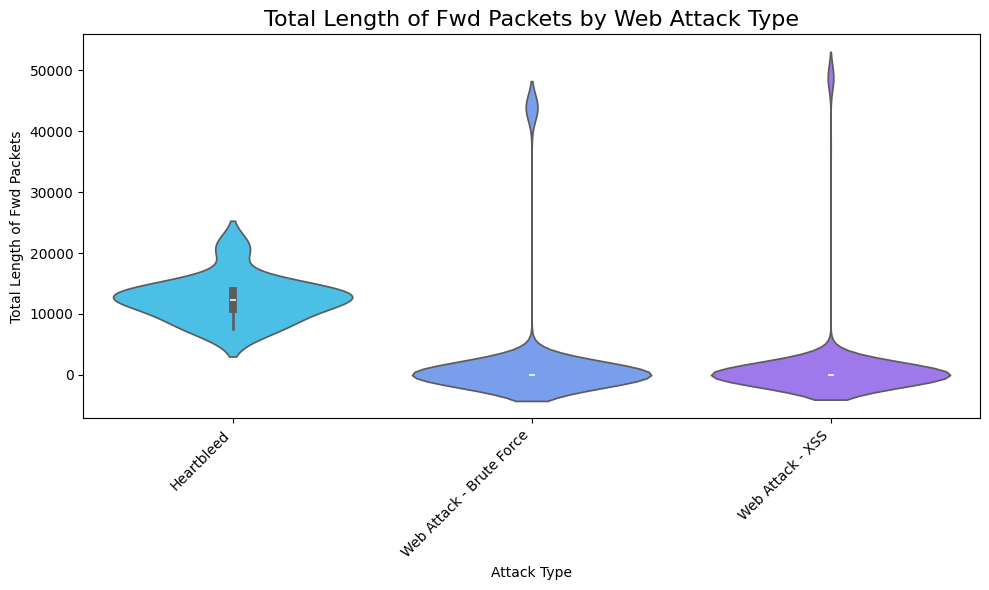

C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\1061808189.py:27: UserWarning:

The palette list has more values (4) than needed (3), which may not be intended.



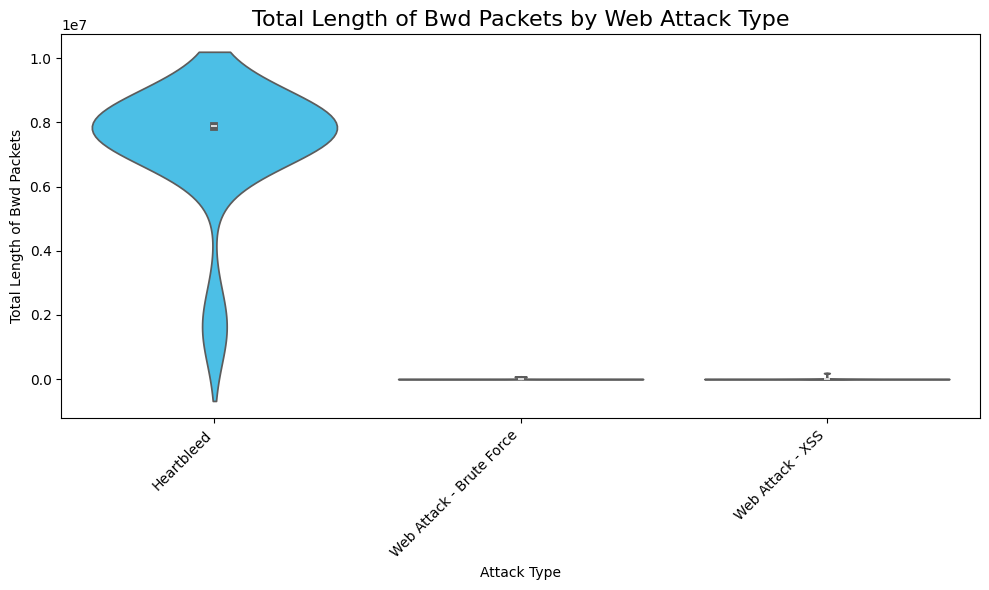

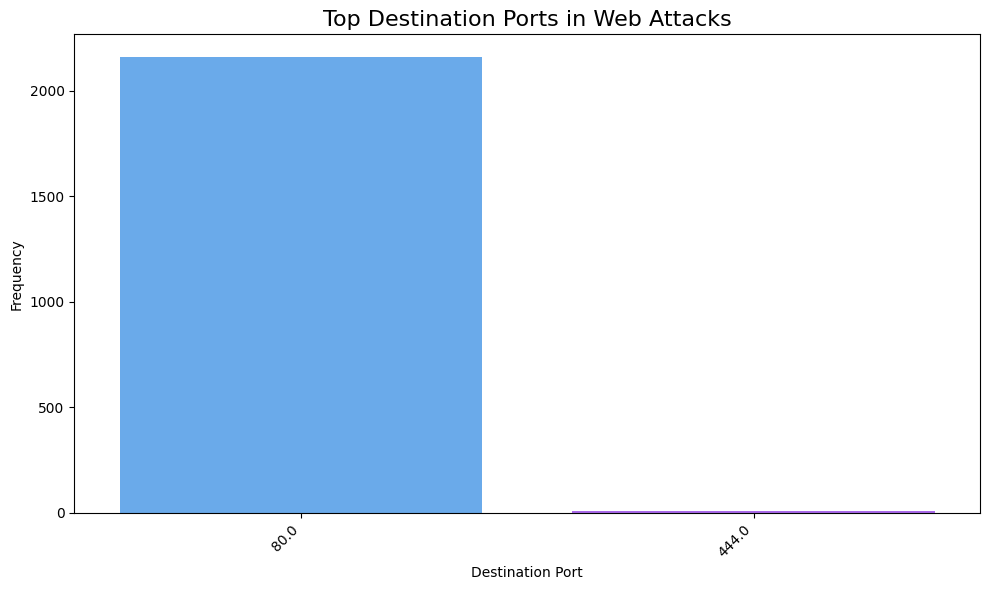

Top destination ports in web attacks:
Destination Port
80.0     2159
444.0      11


In [39]:
df_full = load_full_dataset()
df_full.columns = df_full.columns.str.strip()
web_labels = ['Web Attack - SQL Injection', 'Web Attack - XSS', 'Web Attack - Brute Force', 'Heartbleed']
df_web = df_full[df_full['Label'].isin(web_labels)].copy()

# Violin plot for Total Length of Fwd Packets
plt.figure(figsize=(10, 6))
colors_web = sns.color_palette('cool', len(web_labels))
sns.violinplot(
    x='Label',
    y='Total Length of Fwd Packets',
    data=df_web,
    hue='Label',
    palette=colors_web,
    legend=False
)
plt.title('Total Length of Fwd Packets by Web Attack Type', fontsize=16)
plt.xlabel('Attack Type')
plt.ylabel('Total Length of Fwd Packets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('saved_matplotlib/6/total_length_fwd_packets_violinplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Violin plot for Total Length of Bwd Packets
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Label',
    y='Total Length of Bwd Packets',
    data=df_web,
    hue='Label',
    palette=colors_web,
    legend=False
)
plt.title('Total Length of Bwd Packets by Web Attack Type', fontsize=16)
plt.xlabel('Attack Type')
plt.ylabel('Total Length of Bwd Packets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('saved_matplotlib/6/total_length_bwd_packets_violinplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Bar chart of Destination Ports
top_ports = df_web['Destination Port'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
colors_ports = sns.color_palette('cool', n_colors=len(top_ports))
sns.barplot(
    x=top_ports.index.astype(str),
    y=top_ports.values,
    hue=top_ports.index.astype(str),
    palette=colors_ports,
    legend=False
)
plt.title('Top Destination Ports in Web Attacks', fontsize=16)
plt.xlabel('Destination Port')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('saved_matplotlib/6/web_attack_top_destination_ports.png', dpi=300, bbox_inches='tight')
plt.show()

print("Top destination ports in web attacks:")
print(top_ports.to_string())

In [40]:
df_full = load_full_dataset()
df_full.columns = df_full.columns.str.strip()

# --- 2. Without BENIGN ---
needle_labels_no_benign = ['Web Attack - XSS', 'Web Attack - SQL Injection', 'Heartbleed']
df_needle_no_benign = df_full[df_full['Label'].isin(needle_labels_no_benign)].copy()

features = ['Fwd Packet Length Max', 'Bwd Packet Length Max', 'Avg Fwd Segment Size', 'Flow IAT Mean', 'Flow Duration']

color_map_no_benign = {
    'Web Attack - XSS': 'red',
    'Web Attack - SQL Injection': 'blue',
    'Heartbleed': 'green'
}

df_needle_no_benign = df_needle_no_benign.groupby('Label').apply(lambda x: x.sample(min(len(x), 500), random_state=42)).reset_index(drop=True)

df_scaled_no_benign = df_needle_no_benign.copy()
for feature in features:
    df_scaled_no_benign[feature] = (df_needle_no_benign[feature] - df_needle_no_benign[feature].min()) / (df_needle_no_benign[feature].max() - df_needle_no_benign[feature].min())

label_to_index_no_benign = {label: i for i, label in enumerate(needle_labels_no_benign)}
df_scaled_no_benign['Color'] = df_scaled_no_benign['Label'].map(label_to_index_no_benign)

colorscale_no_benign = [
    [0.0, 'red'],
    [0.33, 'red'],
    [0.33, 'blue'],
    [0.66, 'blue'],
    [0.66, 'green'],
    [1.0, 'green']
]

dimensions_no_benign = []
for feature in features:
    dimensions_no_benign.append(
        dict(
            label=feature,
            values=df_scaled_no_benign[feature],
            range=[0, 1]
        )
    )

fig2 = go.Figure(data=go.Parcoords(
    line=dict(
        color=df_scaled_no_benign['Color'],
        colorscale=colorscale_no_benign,
        cmin=0,
        cmax=len(needle_labels_no_benign)-1,
        showscale=True,
        colorbar=dict(
            title='Label',
            tickvals=list(label_to_index_no_benign.values()),
            ticktext=list(label_to_index_no_benign.keys())
        )
    ),
    dimensions=dimensions_no_benign
))

fig2.update_layout(
    title='Parallel Coordinates Plot for Needle in a Haystack Attacks (NO BENIGN)',
    font=dict(size=12)
)
pio.write_image(fig2, 'saved_matplotlib/6/needle_in_haystack_parallel_coordinates_no_benign.png', scale=2)
pio.show(fig2)

C:\Users\PanHe\AppData\Local\Temp\ipykernel_25712\1580446257.py:16: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



ValueError: 
Image export using the "kaleido" engine requires the Kaleido package,
which can be installed using pip:

    $ pip install --upgrade kaleido


### **7 Infiltration**

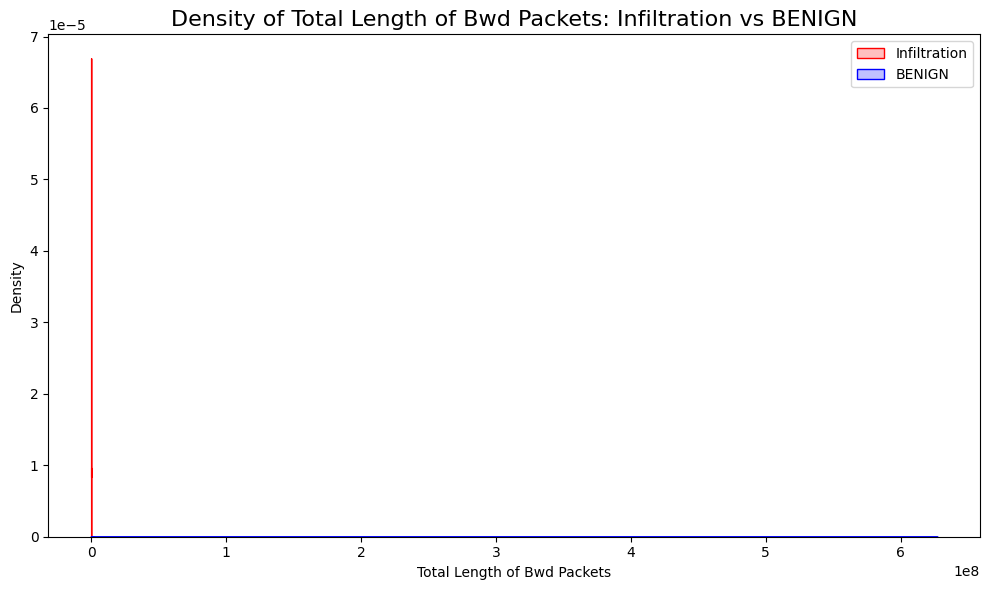

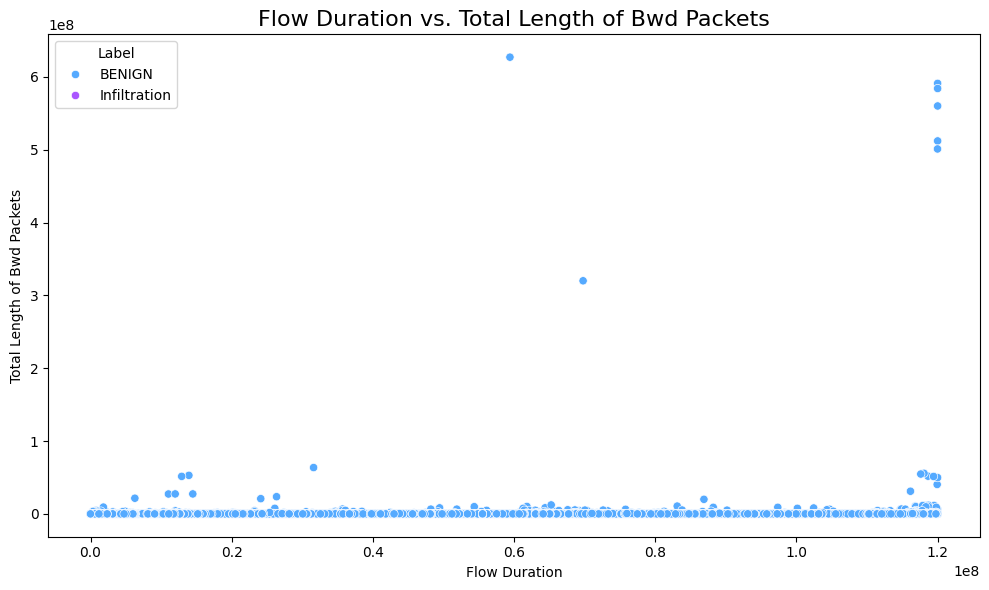

In [41]:
df_thu = load_dataset('Thu')
df_thu.columns = df_thu.columns.str.strip()
inf_labels = ['Infiltration', 'BENIGN']
df_inf = df_thu[df_thu['Label'].isin(inf_labels)].copy()

# Overlaid Density Plots for Total Length of Bwd Packets
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_inf[df_inf['Label'] == 'Infiltration'],
    x='Total Length of Bwd Packets',
    label='Infiltration',
    fill=True,
    color='red'
)
sns.kdeplot(
    data=df_inf[df_inf['Label'] == 'BENIGN'],
    x='Total Length of Bwd Packets',
    label='BENIGN',
    fill=True,
    color='blue'
)
plt.title('Density of Total Length of Bwd Packets: Infiltration vs BENIGN', fontsize=16)
plt.xlabel('Total Length of Bwd Packets')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig('saved_matplotlib/7/infiltration_total_length_bwd_packets_density.png', dpi=300, bbox_inches='tight')
plt.show()

# Scatter Plot of Flow Duration vs. Total Length of Bwd Packets
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_inf,
    x='Flow Duration',
    y='Total Length of Bwd Packets',
    hue='Label',
    palette='cool'
)
plt.title('Flow Duration vs. Total Length of Bwd Packets', fontsize=16)
plt.xlabel('Flow Duration')
plt.ylabel('Total Length of Bwd Packets')
plt.tight_layout()
plt.savefig('saved_matplotlib/7/infiltration_flow_duration_vs_total_length_bwd_packets_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

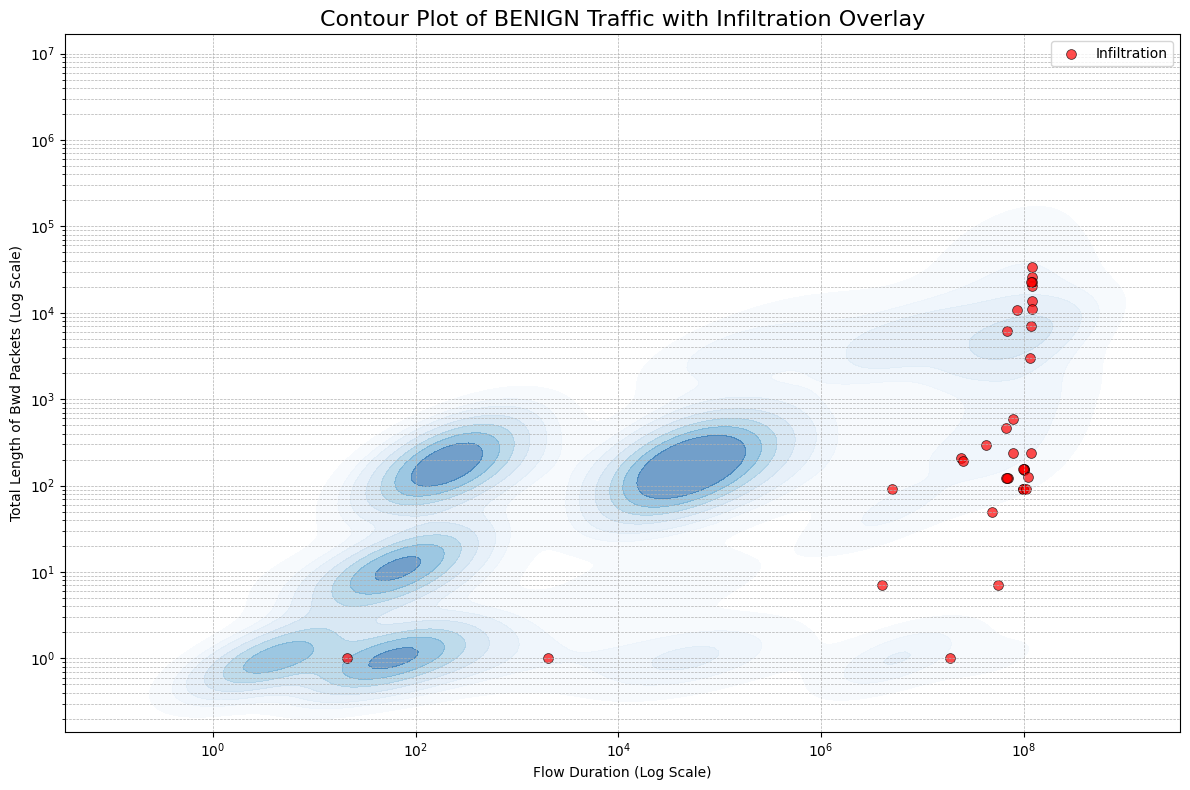

Number of BENIGN flows (total): 456714
Number of BENIGN flows (sampled for plot): 10000
Number of Infiltration flows plotted: 36


In [42]:
df_thu = load_dataset('Thu')
df_thu.columns = df_thu.columns.str.strip()
inf_labels = ['Infiltration', 'BENIGN']
df_inf = df_thu[df_thu['Label'].isin(inf_labels)].copy()

df_benign = df_inf[df_inf['Label'] == 'BENIGN'].copy()
df_infiltration = df_inf[df_inf['Label'] == 'Infiltration'].copy()

# fix to avoid log(0)
df_benign['Flow Duration'] += 1
df_benign['Total Length of Bwd Packets'] += 1
df_infiltration['Flow Duration'] += 1
df_infiltration['Total Length of Bwd Packets'] += 1

plt.figure(figsize=(12, 8))

benign_sample = df_benign.sample(n=min(len(df_benign), 10000), random_state=42)

# Density contours for benign
sns.kdeplot(
    data=benign_sample,
    x='Flow Duration',
    y='Total Length of Bwd Packets',
    fill=True,
    cmap='Blues',
    alpha=0.6,
    levels=8,
    log_scale=(True, True)
)

# Overlay of infiltration over benign contours
sns.scatterplot(
    data=df_infiltration,
    x='Flow Duration',
    y='Total Length of Bwd Packets',
    color='red',
    label='Infiltration',
    s=50,
    alpha=0.7,
    edgecolor='black'
)

plt.title('Contour Plot of BENIGN Traffic with Infiltration Overlay', fontsize=16)
plt.xlabel('Flow Duration (Log Scale)')
plt.ylabel('Total Length of Bwd Packets (Log Scale)')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.savefig('saved_matplotlib/7/infiltration_benign_contour_overlay.png', dpi=300, bbox_inches='tight')
plt.show()

benign_count = df_benign.shape[0]
infiltration_count = df_infiltration.shape[0]
print(f"Number of BENIGN flows (total): {benign_count}")
print(f"Number of BENIGN flows (sampled for plot): {len(benign_sample)}")
print(f"Number of Infiltration flows plotted: {infiltration_count}")